In [1]:
#Importing all the libraries
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot #For Visulization of data
import seaborn as sns
import warnings 

#Date related Libraries
from datetime import date
#import holidays
import datetime


warnings.filterwarnings('ignore') #To Ignore the warnings

In [2]:
#machine Learning models Libraries
#from sklearn.linear_model import SGDRegressor
#from sklearn.linear_model import RidgeCV


#Preprocessing related Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

## Major Holidays 
SuperBowl - > February ; 
Labor Day -> September ; 
Thanksgiving -> November ; 
Christmas -> December

#### Loading DataSets

In [3]:
df_train = pd.read_csv('/Users/omkarnevagi/Documents/Python/Dissertation/train.csv')

In [4]:
df_test = pd.read_csv('/Users/omkarnevagi/Documents/Python/Dissertation/test.csv')

In [5]:
df_features = pd.read_csv('/Users/omkarnevagi/Documents/Python/Dissertation/features.csv')

In [6]:
df_stores = pd.read_csv('/Users/omkarnevagi/Documents/Python/Dissertation/stores.csv')

#### Data Analysis and Data Cleaning

In [7]:
 #To check the first 5 columns of training data
df_train.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
#To check the null values present in training dataset
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [10]:
#To check the first 5 columns of test data
df_test.head()

Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [12]:
#To check the null values present in testing dataset
df_test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [13]:
df_stores.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [14]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [15]:
# To find null values present in stores dataset
df_stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [16]:
df_features.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [17]:
#To retrieve all the column names
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [18]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [19]:
#To check total number of rows and columns
df_features.shape

(8190, 12)

In [20]:
# To count the number of null values in the dataset
df_features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [21]:
#To find the total Null or NA values percentage in features dataset
features_missing_percent = df_features.isnull().sum() * 100 / len (df_features)

missing_features = pd.DataFrame({'column':df_features.isnull().sum(), 'percentage': features_missing_percent}) 
missing_features

column  percentage
Store              0    0.000000
Date               0    0.000000
Temperature        0    0.000000
Fuel_Price         0    0.000000
MarkDown1       4158   50.769231
MarkDown2       5269   64.334554
MarkDown3       4577   55.885226
MarkDown4       4726   57.704518
MarkDown5       4140   50.549451
CPI              585    7.142857
Unemployment     585    7.142857
IsHoliday          0    0.000000

1. 7% missing data in both CPI and Unemployment columns.
2. More than 50% of null or NA values in all the Markdowns.

In [22]:
df_features.describe()

Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.738346      1.877259  
min      -179.260000      0.220000    -185.170000   126.064000      3.684000  
25%         6.600000    304.687500    1440.827500   132.364839      6.634000  
50%        36.260000   1176.425000    2727.135000   182.764003      7.806000  
75%       163.150000   3310.007500    4832.555000   213.932412      8.567000  
max    149483.310000  67474.850000  771448.100000   228.976456     14.313000

<AxesSubplot:xlabel='CPI'>

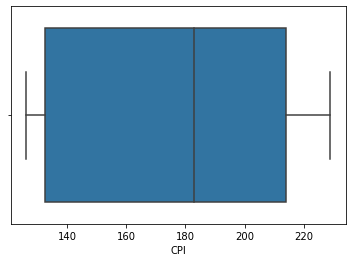

In [23]:
# To visualize the CPI variable using boxplot
sns.boxplot(x=df_features['CPI'])

In [24]:
df_features['CPI'].fillna((df_features['CPI'].mean()), inplace=True)
print(df_features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


<AxesSubplot:xlabel='Unemployment'>

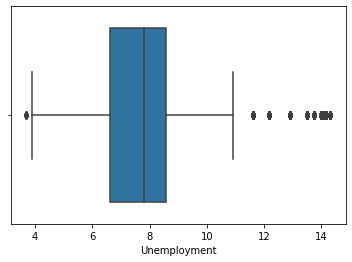

In [25]:
sns.boxplot(x=df_features['Unemployment'])

1. Unemployment variable has outliers. 
2. The column is right skewed.
3. Replacing the null values in Unemployement column with median values

In [26]:
df_features['Unemployment'].fillna((df_features['Unemployment'].median()), inplace=True)

In [27]:
features_missing_percent = df_features.isnull().sum() * 100 / len (df_features)

missing_features = pd.DataFrame({'column':df_features.isnull().sum(), 'percentage': features_missing_percent}) 
missing_features

column  percentage
Store              0    0.000000
Date               0    0.000000
Temperature        0    0.000000
Fuel_Price         0    0.000000
MarkDown1       4158   50.769231
MarkDown2       5269   64.334554
MarkDown3       4577   55.885226
MarkDown4       4726   57.704518
MarkDown5       4140   50.549451
CPI                0    0.000000
Unemployment       0    0.000000
IsHoliday          0    0.000000

The null values of CPI and unemployment is are replaced with mean and median.

In [28]:
#All the 5 markdowns have the missing value percentage more than 50. 
# Replacing the markdown values 
from statistics import mean

df_features['MarkDown1'] = df_features['MarkDown1'].fillna(0)
df_features['MarkDown2'] = df_features['MarkDown2'].fillna(0)
df_features['MarkDown3'] = df_features['MarkDown3'].fillna(0)
df_features['MarkDown4'] = df_features['MarkDown4'].fillna(0)
df_features['MarkDown5'] = df_features['MarkDown5'].fillna(0)

In [29]:
percent_missing = df_features.isnull().sum() * 100 / len(df_features)
missing_value = pd.DataFrame({'column_name': df_features.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value

column_name  percent_missing
Store                   0              0.0
Date                    0              0.0
Temperature             0              0.0
Fuel_Price              0              0.0
MarkDown1               0              0.0
MarkDown2               0              0.0
MarkDown3               0              0.0
MarkDown4               0              0.0
MarkDown5               0              0.0
CPI                     0              0.0
Unemployment            0              0.0
IsHoliday               0              0.0

In [30]:
df_train.describe()

Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000

In [31]:
# To find total rows and columns in Training dataset
df_train.shape

(421570, 5)

In [32]:
# There are negative values present weekly sales.

df_train[df_train.Weekly_Sales < 0]

Store  Dept        Date  Weekly_Sales  IsHoliday
846         1     6  2012-08-10       -139.65      False
2384        1    18  2012-05-04         -1.27      False
6048        1    47  2010-02-19       -863.00      False
6049        1    47  2010-03-12       -698.00      False
6051        1    47  2010-10-08        -58.00      False
...       ...   ...         ...           ...        ...
419597     45    80  2010-02-12         -0.43       True
419598     45    80  2010-02-19         -0.27      False
419603     45    80  2010-04-16         -1.61      False
419614     45    80  2010-07-02         -0.27      False
419640     45    80  2011-02-11         -0.24       True

[1285 rows x 5 columns]

In [33]:
#1285 data have the negative values in the weekely sales column.
#Taking only values greater than zero
df_train = df_train[df_train.Weekly_Sales >= 0]
df_train.describe()

Store           Dept   Weekly_Sales
count  420285.000000  420285.000000  420285.000000
mean       22.195477      44.242771   16030.329773
std        12.787213      30.507197   22728.500149
min         1.000000       1.000000       0.000000
25%        11.000000      18.000000    2117.560000
50%        22.000000      37.000000    7659.090000
75%        33.000000      74.000000   20268.380000
max        45.000000      99.000000  693099.360000

In [34]:
#Total of 1285 rows with negative values have been removed.
df_train.shape

(420285, 5)

In [35]:
421570 - 420285

1285

## Exploratory Data Analysis


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.4+ MB


In [37]:
#Date value is Object

#Converting date column to datetime 
df_train['Date'] = pd.to_datetime(df_train.Date)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 16.4 MB


In [38]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [39]:
df_train["IsHoliday"].head()

0    False
1     True
2    False
3    False
4    False
Name: IsHoliday, dtype: bool

In [40]:
#Is Holiday column is in boolean format. Changing it to binary data
#0 -> False
#1 -> True
df_train["IsHoliday"] = df_train["IsHoliday"].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 19.2 MB


In [41]:
df_train["IsHoliday"].head()

0    0
1    1
2    0
3    0
4    0
Name: IsHoliday, dtype: int64

In [42]:
df_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50          0
1      1     1 2010-02-12      46039.49          1
2      1     1 2010-02-19      41595.55          0
3      1     1 2010-02-26      19403.54          0
4      1     1 2010-03-05      21827.90          0

In [43]:
#Extraction of Year, Month, Week, Day and total number of days.

df_train['Year']=df_train['Date'].dt.year # To extract year
df_train['Month']=df_train['Date'].dt.month # To extract month
df_train['Week']=df_train['Date'].dt.week # To extract week
df_train['Day']=df_train['Date'].dt.day# To extract Day
df_train['n_days']=(df_train['Date'].dt.date-df_train['Date'].dt.date.min()).apply(lambda x:x.days) #Too extract total number of days

df_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50          0  2010      2     5    5   
1      1     1 2010-02-12      46039.49          1  2010      2     6   12   
2      1     1 2010-02-19      41595.55          0  2010      2     7   19   
3      1     1 2010-02-26      19403.54          0  2010      2     8   26   
4      1     1 2010-03-05      21827.90          0  2010      3     9    5   

   n_days  
0       0  
1       7  
2      14  
3      21  
4      28

In [44]:
df_train.tail()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  \
421565     45    98 2012-09-28        508.37          0  2012      9    39   
421566     45    98 2012-10-05        628.10          0  2012     10    40   
421567     45    98 2012-10-12       1061.02          0  2012     10    41   
421568     45    98 2012-10-19        760.01          0  2012     10    42   
421569     45    98 2012-10-26       1076.80          0  2012     10    43   

        Day  n_days  
421565   28     966  
421566    5     973  
421567   12     980  
421568   19     987  
421569   26     994

Total of 994 days.

In [45]:
df_test.dtypes

Store         int64
Dept          int64
Date         object
IsHoliday      bool
dtype: object

In [46]:
df_test['Date'] = pd.to_datetime(df_test.Date)
df_test.head()

Store  Dept       Date  IsHoliday
0      1     1 2012-11-02      False
1      1     1 2012-11-09      False
2      1     1 2012-11-16      False
3      1     1 2012-11-23       True
4      1     1 2012-11-30      False

In [47]:
# Converting IsHoliday data type to integer
df_test["IsHoliday"] = df_test["IsHoliday"].astype(int)

In [48]:
df_test.dtypes

Store                 int64
Dept                  int64
Date         datetime64[ns]
IsHoliday             int64
dtype: object

In [49]:
# To retrieve year, month, week, date and number of days.
df_test['Year'] = df_test['Date'].dt.year
df_test['Month'] = df_test['Date'].dt.month
df_test['Week'] = df_test['Date'].dt.week
df_test['Day'] = df_test['Date'].dt.day
df_test['n_days'] = (df_test['Date'].dt.date-df_test['Date'].dt.date.min()).apply(lambda x:x.days)

df_test.head()

Store  Dept       Date  IsHoliday  Year  Month  Week  Day  n_days
0      1     1 2012-11-02          0  2012     11    44    2       0
1      1     1 2012-11-09          0  2012     11    45    9       7
2      1     1 2012-11-16          0  2012     11    46   16      14
3      1     1 2012-11-23          1  2012     11    47   23      21
4      1     1 2012-11-30          0  2012     11    48   30      28

In [50]:
df_test.tail()

Store  Dept       Date  IsHoliday  Year  Month  Week  Day  n_days
115059     45    98 2013-06-28          0  2013      6    26   28     238
115060     45    98 2013-07-05          0  2013      7    27    5     245
115061     45    98 2013-07-12          0  2013      7    28   12     252
115062     45    98 2013-07-19          0  2013      7    29   19     259
115063     45    98 2013-07-26          0  2013      7    30   26     266

Total of 266 days present in testin dataset

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int64         
 5   Year          420285 non-null  int64         
 6   Month         420285 non-null  int64         
 7   Week          420285 non-null  int64         
 8   Day           420285 non-null  int64         
 9   n_days        420285 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8)
memory usage: 35.3 MB


In [52]:
#How holidays have impacted the sales.

print("Holiday")
print(df_train[df_train['IsHoliday']== 1]['Weekly_Sales'].describe())
print("Non-Holiday")
print(df_train[df_train['IsHoliday']== 0]['Weekly_Sales'].describe())

Holiday
count     29563.000000
mean      17092.566220
std       27249.206776
min           0.000000
25%        2122.830000
50%        7997.860000
75%       21256.915000
max      693099.360000
Name: Weekly_Sales, dtype: float64
Non-Holiday
count    390722.000000
mean      15949.958317
std       22347.258698
min           0.000000
25%        2117.300000
50%        7636.080000
75%       20193.912500
max      406988.630000
Name: Weekly_Sales, dtype: float64


Sales in Holiday week in more when compared to sales in non- holiday week

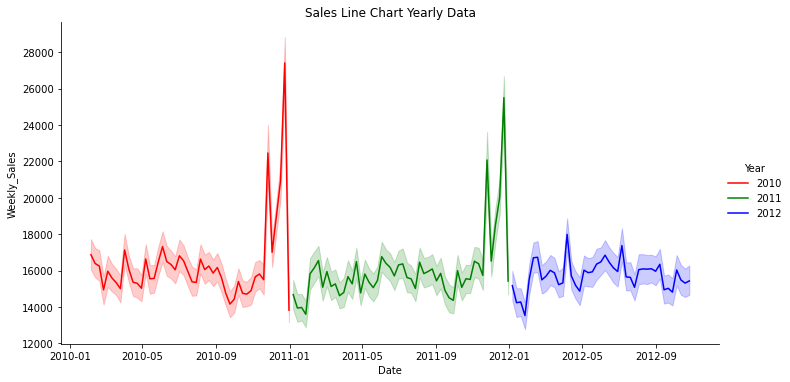

In [53]:
sns.relplot(x = 'Date',y = 'Weekly_Sales',hue = 'Year',data = df_train, palette = ['red','green', 'blue'], kind = 'line',aspect = 2)
plt.title("Sales Line Chart Yearly Data")
plt.show()
#The analysis is checked for an entire year

1. The sales trend continue to be same for all three years.
2. The affect of thanksgiving and christmas have huge impact on sales comapred to superbowl or labor day.

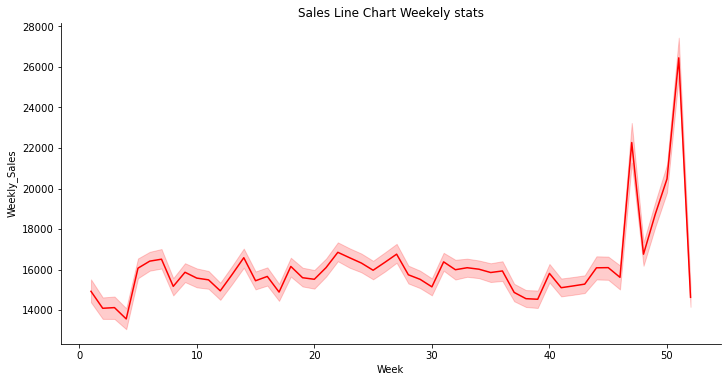

In [54]:
#Effect of Holidays on Sales weekely basis
sns.relplot(x = 'Week',y = 'Weekly_Sales', data =  df_train, color = 'red',kind='line',aspect=2)
plt.title("Sales Line Chart Weekely stats")
plt.show()

Similar pattern is observed for weekly data as the sales are at peak for last weeks

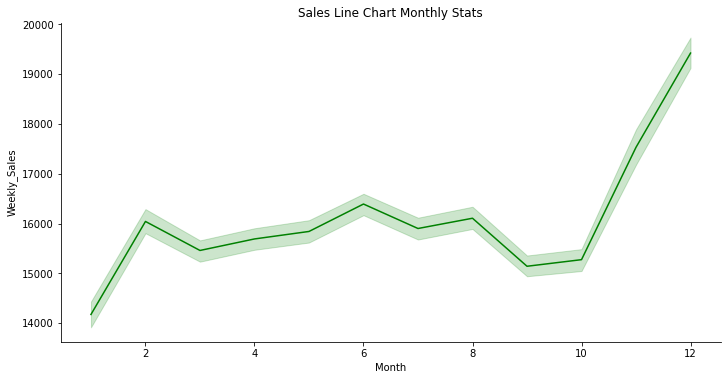

In [55]:
sns.relplot(x = 'Month', y = 'Weekly_Sales', data = df_train, color = 'green' , kind = 'line', aspect = 2)
plt.title("Sales Line Chart Monthly Stats")
plt.show()

In [56]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [57]:
df_features.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [58]:
# Need to convert data type to datetype for 'Date'column 
df_features['Date'] = pd.to_datetime(df_features.Date)
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [59]:
df_features["IsHoliday"].head()

0    False
1     True
2    False
3    False
4    False
Name: IsHoliday, dtype: bool

In [60]:
# Boolean value of Holiday must be chnaged to binary value.
df_features["IsHoliday"] = df_features["IsHoliday"].astype(int)
df_features.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                int64
dtype: object

In [61]:
df_features["IsHoliday"].head()
# False -> 0
# True -> 1

0    0
1    1
2    0
3    0
4    0
Name: IsHoliday, dtype: int64

In [62]:
df_stores.dtypes

Store     int64
Type     object
Size      int64
dtype: object

<AxesSubplot:xlabel='Type', ylabel='count'>

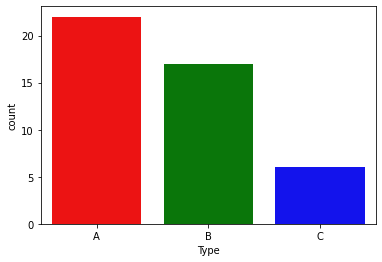

In [63]:
sns.countplot(x = 'Type', data = df_stores ,palette=['red','green', 'blue'], saturation = 0.85)
#Store 'A' is more in number than store 'B' and 'C'.

In [64]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 767.9 KB


In [65]:
# Merging of Features data on to the stores dataset

df_stores = df_stores.merge(df_features, on = 'Store', how = 'left')
df_stores

Store Type    Size       Date  Temperature  Fuel_Price  MarkDown1  \
0         1    A  151315 2010-02-05        42.31       2.572       0.00   
1         1    A  151315 2010-02-12        38.51       2.548       0.00   
2         1    A  151315 2010-02-19        39.93       2.514       0.00   
3         1    A  151315 2010-02-26        46.63       2.561       0.00   
4         1    A  151315 2010-03-05        46.50       2.625       0.00   
...     ...  ...     ...        ...          ...         ...        ...   
8185     45    B  118221 2013-06-28        76.05       3.639    4842.29   
8186     45    B  118221 2013-07-05        77.50       3.614    9090.48   
8187     45    B  118221 2013-07-12        79.37       3.614    3789.94   
8188     45    B  118221 2013-07-19        82.84       3.737    2961.49   
8189     45    B  118221 2013-07-26        76.06       3.804     212.02   

      MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0          0.00       0.00       0.00       0.00  211.096358         8.106   
1          0.00       0.00       0.00       0.00  211.242170         8.106   
2          0.00       0.00       0.00       0.00  211.289143         8.106   
3          0.00       0.00       0.00       0.00  211.319643         8.106   
4          0.00       0.00       0.00       0.00  211.350143         8.106   
...         ...        ...        ...        ...         ...           ...   
8185     975.03       3.00    2449.97    3169.69  172.460809         7.806   
8186    2268.58     582.74    5797.47    1514.93  172.460809         7.806   
8187    1827.31      85.72     744.84    2150.36  172.460809         7.806   
8188    1047.07     204.19     363.00    1059.46  172.460809         7.806   
8189     851.73       2.06      10.88    1864.57  172.460809         7.806   

      IsHoliday  
0             0  
1             1  
2             0  
3             0  
4             0  
...         ...  
8185          0  
8186          0  
8187          0  
8188          0  
8189          0  

[8190 rows x 14 columns]

In [66]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 767.9 KB


In [67]:
#Merging Training dataset on Stores dataset
df_train  = df_train.merge(df_stores, on = ['Store','Date','IsHoliday'],how='left')
df_train

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  \
0           1     1 2010-02-05      24924.50          0  2010      2     5   
1           1     1 2010-02-12      46039.49          1  2010      2     6   
2           1     1 2010-02-19      41595.55          0  2010      2     7   
3           1     1 2010-02-26      19403.54          0  2010      2     8   
4           1     1 2010-03-05      21827.90          0  2010      3     9   
...       ...   ...        ...           ...        ...   ...    ...   ...   
420280     45    98 2012-09-28        508.37          0  2012      9    39   
420281     45    98 2012-10-05        628.10          0  2012     10    40   
420282     45    98 2012-10-12       1061.02          0  2012     10    41   
420283     45    98 2012-10-19        760.01          0  2012     10    42   
420284     45    98 2012-10-26       1076.80          0  2012     10    43   

        Day  n_days  ...    Size  Temperature  Fuel_Price  MarkDown1  \
0         5       0  ...  151315        42.31       2.572       0.00   
1        12       7  ...  151315        38.51       2.548       0.00   
2        19      14  ...  151315        39.93       2.514       0.00   
3        26      21  ...  151315        46.63       2.561       0.00   
4         5      28  ...  151315        46.50       2.625       0.00   
...     ...     ...  ...     ...          ...         ...        ...   
420280   28     966  ...  118221        64.88       3.997    4556.61   
420281    5     973  ...  118221        64.89       3.985    5046.74   
420282   12     980  ...  118221        54.47       4.000    1956.28   
420283   19     987  ...  118221        56.47       3.969    2004.02   
420284   26     994  ...  118221        58.85       3.882    4018.91   

        MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  
0            0.00       0.00       0.00       0.00  211.096358         8.106  
1            0.00       0.00       0.00       0.00  211.242170         8.106  
2            0.00       0.00       0.00       0.00  211.289143         8.106  
3            0.00       0.00       0.00       0.00  211.319643         8.106  
4            0.00       0.00       0.00       0.00  211.350143         8.106  
...           ...        ...        ...        ...         ...           ...  
420280      20.64       1.50    1601.01    3288.25  192.013558         8.684  
420281       0.00      18.82    2253.43    2340.01  192.170412         8.667  
420282       0.00       7.89     599.32    3990.54  192.327265         8.667  
420283       0.00       3.18     437.73    1537.49  192.330854         8.667  
420284      58.08     100.00     211.94     858.33  192.308899         8.667  

[420285 rows x 21 columns]

In [68]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Week', 'Day', 'n_days', 'Type', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment'],
      dtype='object')

In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420285 non-null  int64         
 1   Dept          420285 non-null  int64         
 2   Date          420285 non-null  datetime64[ns]
 3   Weekly_Sales  420285 non-null  float64       
 4   IsHoliday     420285 non-null  int64         
 5   Year          420285 non-null  int64         
 6   Month         420285 non-null  int64         
 7   Week          420285 non-null  int64         
 8   Day           420285 non-null  int64         
 9   n_days        420285 non-null  int64         
 10  Type          420285 non-null  object        
 11  Size          420285 non-null  int64         
 12  Temperature   420285 non-null  float64       
 13  Fuel_Price    420285 non-null  float64       
 14  MarkDown1     420285 non-null  float64       
 15  MarkDown2     420

In [70]:
# Merging stores dataset on test data similar to Training dataset
df_test  = df_test.merge(df_stores,on=['Store','Date','IsHoliday'],how='left')
df_test

Store  Dept       Date  IsHoliday  Year  Month  Week  Day  n_days  \
0           1     1 2012-11-02          0  2012     11    44    2       0   
1           1     1 2012-11-09          0  2012     11    45    9       7   
2           1     1 2012-11-16          0  2012     11    46   16      14   
3           1     1 2012-11-23          1  2012     11    47   23      21   
4           1     1 2012-11-30          0  2012     11    48   30      28   
...       ...   ...        ...        ...   ...    ...   ...  ...     ...   
115059     45    98 2013-06-28          0  2013      6    26   28     238   
115060     45    98 2013-07-05          0  2013      7    27    5     245   
115061     45    98 2013-07-12          0  2013      7    28   12     252   
115062     45    98 2013-07-19          0  2013      7    29   19     259   
115063     45    98 2013-07-26          0  2013      7    30   26     266   

       Type    Size  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0         A  151315        55.32       3.386    6766.44    5147.70      50.82   
1         A  151315        61.24       3.314   11421.32    3370.89      40.28   
2         A  151315        52.92       3.252    9696.28     292.10     103.78   
3         A  151315        56.23       3.211     883.59       4.17   74910.32   
4         A  151315        52.34       3.207    2460.03       0.00    3838.35   
...     ...     ...          ...         ...        ...        ...        ...   
115059    B  118221        76.05       3.639    4842.29     975.03       3.00   
115060    B  118221        77.50       3.614    9090.48    2268.58     582.74   
115061    B  118221        79.37       3.614    3789.94    1827.31      85.72   
115062    B  118221        82.84       3.737    2961.49    1047.07     204.19   
115063    B  118221        76.06       3.804     212.02     851.73       2.06   

        MarkDown4  MarkDown5         CPI  Unemployment  
0         3639.90    2737.42  223.462779         6.573  
1         4646.79    6154.16  223.481307         6.573  
2         1133.15    6612.69  223.512911         6.573  
3          209.91     303.32  223.561947         6.573  
4          150.57    6966.34  223.610984         6.573  
...           ...        ...         ...           ...  
115059    2449.97    3169.69  172.460809         7.806  
115060    5797.47    1514.93  172.460809         7.806  
115061     744.84    2150.36  172.460809         7.806  
115062     363.00    1059.46  172.460809         7.806  
115063      10.88    1864.57  172.460809         7.806  

[115064 rows x 20 columns]

In [71]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int64         
 4   Year          115064 non-null  int64         
 5   Month         115064 non-null  int64         
 6   Week          115064 non-null  int64         
 7   Day           115064 non-null  int64         
 8   n_days        115064 non-null  int64         
 9   Type          115064 non-null  object        
 10  Size          115064 non-null  int64         
 11  Temperature   115064 non-null  float64       
 12  Fuel_Price    115064 non-null  float64       
 13  MarkDown1     115064 non-null  float64       
 14  MarkDown2     115064 non-null  float64       
 15  MarkDown3     115

In [72]:
print("The shape of stores data set is: ", df_stores.shape)

print("The unique value of store is: ", df_stores['Store'].unique())

print("The unique value of Type is: ", df_stores['Type'].unique())

The shape of stores data set is:  (8190, 14)
The unique value of store is:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
The unique value of Type is:  ['A' 'B' 'C']


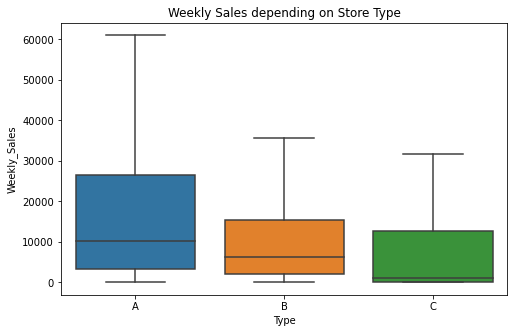

In [73]:
# Box plot of weekly sales and type of store
fig, ax = plt.subplots(figsize=(8, 5))
fig = sns.boxplot(x = 'Type', y = 'Weekly_Sales', data = df_train, showfliers = False)
plt.title("Weekly Sales depending on Store Type")
plt.show()

1. Weekely Sales of store A is more than B and C.
2. By this one can also infer than as size of the store increases, the sales values also increases.

In [74]:
#Average Sales of the year Store wise

!pip install plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

store_sales_2010 = df_train[df_train.Year==2010].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = df_train[df_train.Year==2011].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])

store_sales_2012 =df_train[df_train.Year==2012].groupby('Store')['Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011", "Average Store Sales 2012"))

fig.add_trace(go.Bar(x = store2010_df.Store, y = store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x = store2011_df.Store, y = store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x = store2012_df.Store, y = store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1500)

fig.update_xaxes(title_text="Store", row=1, col=1)
fig.update_xaxes(title_text="Store", row=2, col=1)
fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="Average Sales", row=1, col=1)
fig.update_yaxes(title_text="Average Sales", row=2, col=1)
fig.update_yaxes(title_text="Average Sales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

1. The Average sales remain constant across all the three years.
2. Store 20, 14, 13, 4, and 2 have highest sales.

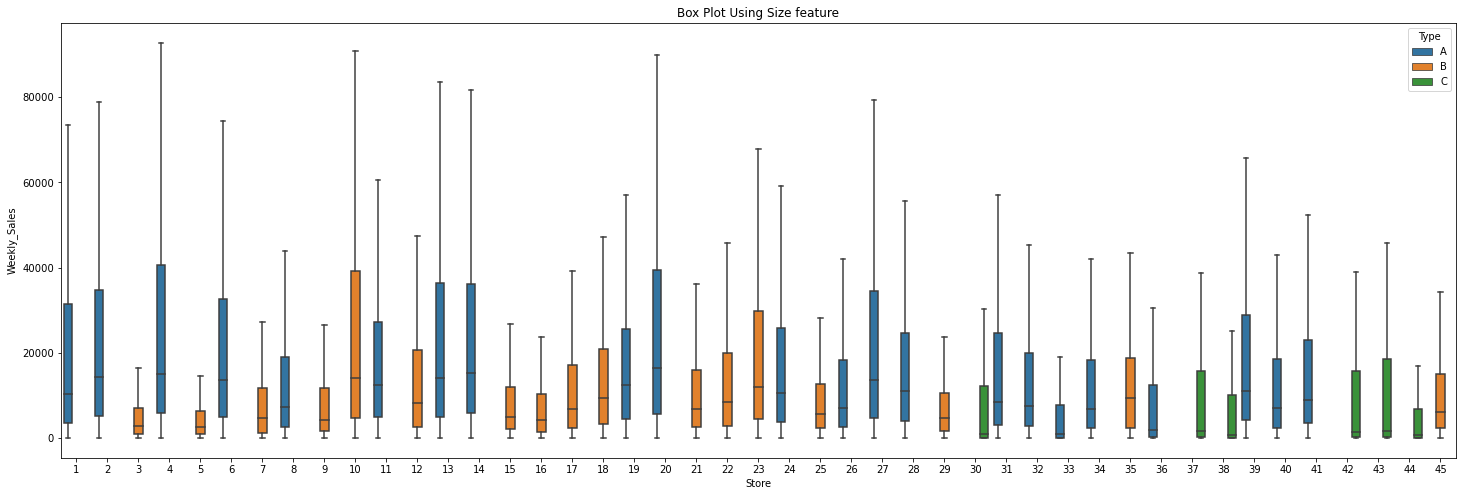

In [75]:
# Visualizing the weekly sales with respect to department type

fig, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x="Store",y='Weekly_Sales',data = df_train, showfliers = False, hue = "Type")
plt.title("Box Plot Using Size feature")
plt.show()

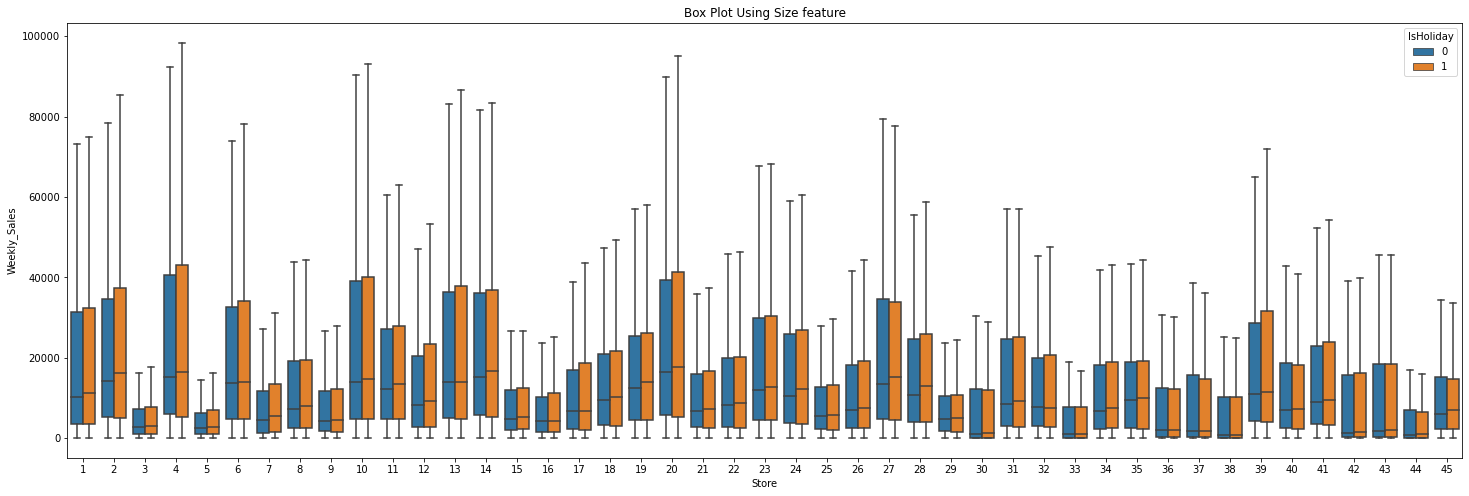

In [76]:
#Impact of Holidays on stores and their sales.

fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Store', y='Weekly_Sales', data=df_train, showfliers=False, hue="IsHoliday")
plt.title("Box Plot Using Size feature")
plt.show()

Sales are more in number for maximum stores when there is holiday.

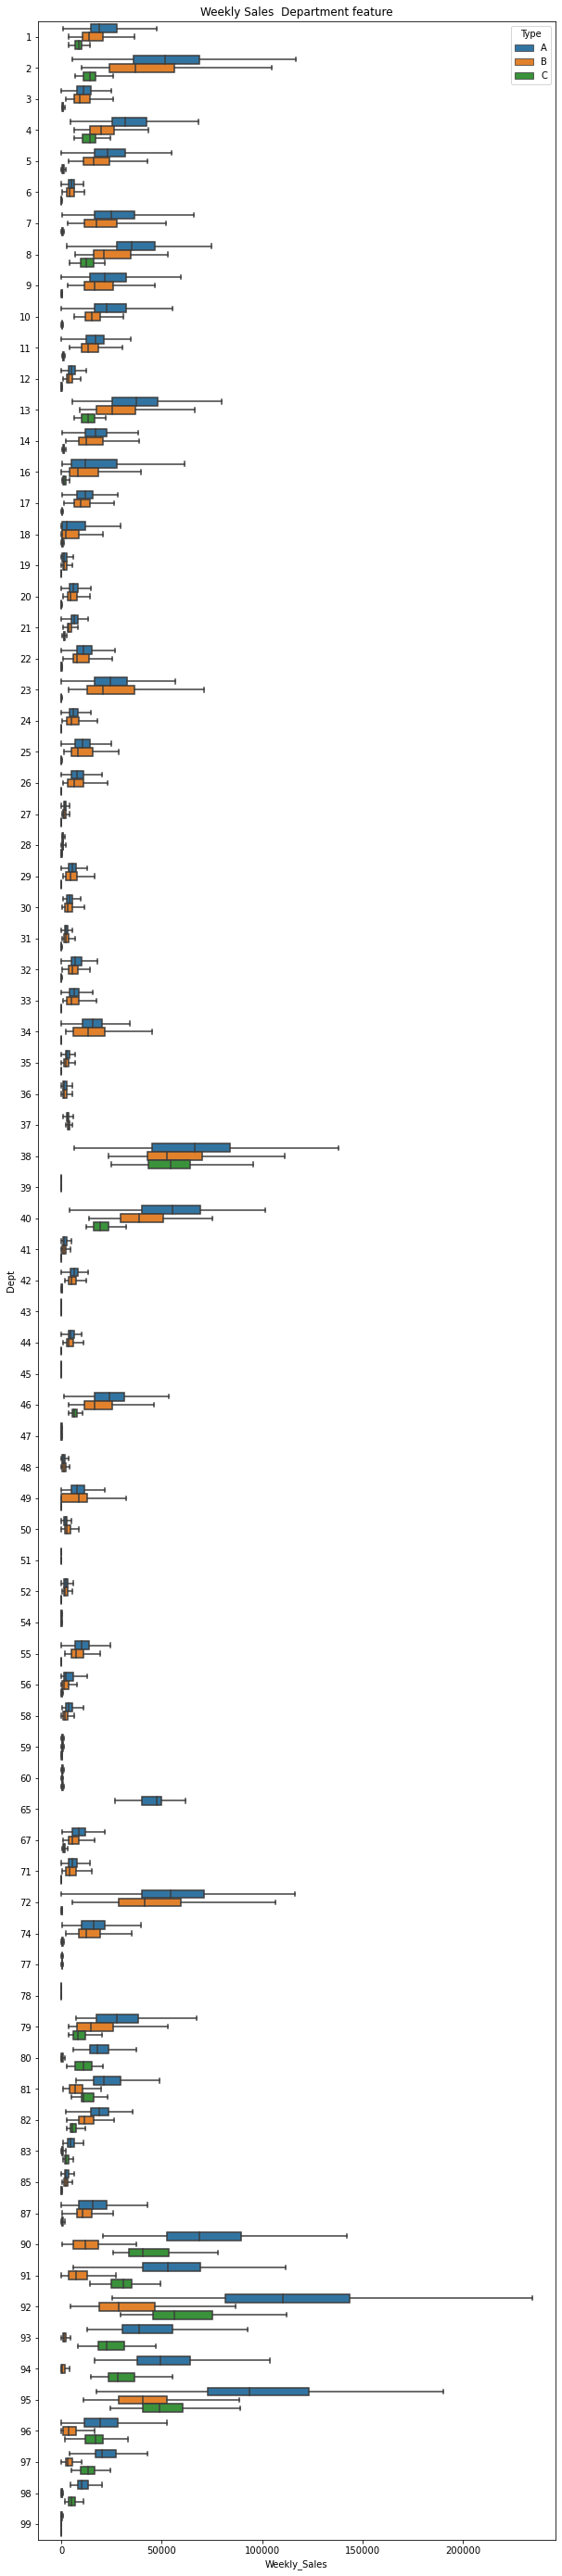

In [77]:
#Impact of Weekly sales with respect to department
fig, ax = plt.subplots(figsize=(10, 50))
fig = sns.boxplot(y = 'Dept', x = 'Weekly_Sales', data = df_train, showfliers = False, hue = "Type",orient = "h") 
plt.title("Weekly Sales  Department feature")
plt.show()

1. Department can be a factor in predicting sales.
2. It can be seen through plot that every department has a different sales than other.
3. Further, department factor is also correlated with store type.
4. Type A has higher sales in most of the department.
5. Department are 38,65,72,92 and 95 which have highest average sales.

In [78]:
# Average Department Sales per year

dept_sales_2010 = df_train[df_train.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = df_train[df_train.Year==2011].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = df_train[df_train.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Dept Sales 2010", "Average Dept Sales 2011", "Average Dept Sales 2012"))

fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template = 'plotly_dark', showlegend=False, height=1000)

fig.update_xaxes(title_text="Average Sales", row=1, col=1)
fig.update_xaxes(title_text="Average Sales", row=1, col=2)
fig.update_xaxes(title_text="Average Sales", row=1, col=3)

fig.update_yaxes(title_text="Department", row=1, col=1)
fig.update_yaxes(title_text="Department", row=1, col=2)
fig.update_yaxes(title_text="Department", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

#### Monthly Sales Data - Visualization

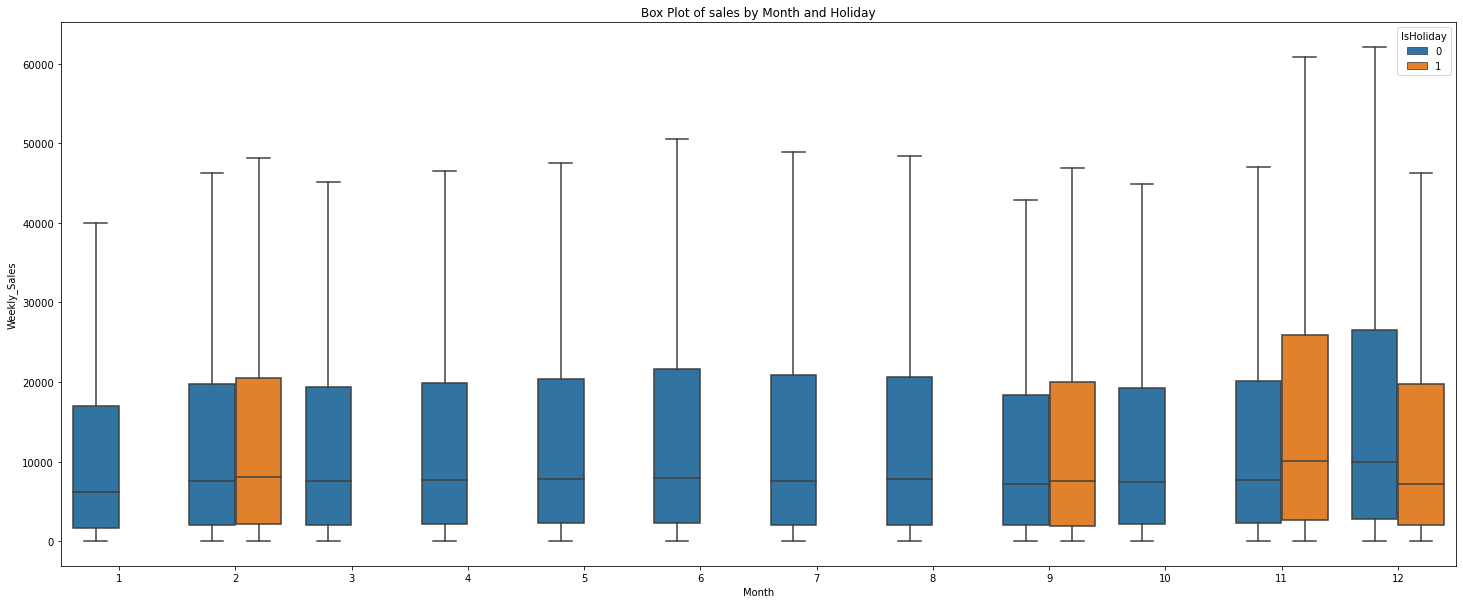

In [79]:
# Sales Distribution on Monthly Data
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x = 'Month', y = 'Weekly_Sales', data = df_train, showfliers = False, hue = "IsHoliday")
plt.title("Box Plot of sales by Month and Holiday")
plt.show()

1. The Sales is more especially during holidays.
2. In December Month beacuse of christmas, the shopping is more even on non holiday.

In [80]:
df_train['month_end'] = np.where(df_train.Day > 22, 1, 0) #Month end is considered as the last week
df_train['month_start'] = np.where(df_train.Day < 7, 1, 0) #Month start is considered as first week
df_train['month_end'] = df_train['month_end'].astype('bool')
df_train['month_start'] = df_train['month_start'].astype('bool')

df_train.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week  Day  \
0      1     1 2010-02-05      24924.50          0  2010      2     5    5   
1      1     1 2010-02-12      46039.49          1  2010      2     6   12   
2      1     1 2010-02-19      41595.55          0  2010      2     7   19   
3      1     1 2010-02-26      19403.54          0  2010      2     8   26   
4      1     1 2010-03-05      21827.90          0  2010      3     9    5   

   n_days  ... Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0       0  ...      2.572        0.0        0.0        0.0        0.0   
1       7  ...      2.548        0.0        0.0        0.0        0.0   
2      14  ...      2.514        0.0        0.0        0.0        0.0   
3      21  ...      2.561        0.0        0.0        0.0        0.0   
4      28  ...      2.625        0.0        0.0        0.0        0.0   

   MarkDown5         CPI  Unemployment  month_end  month_start  
0        0.0  211.096358         8.106      False         True  
1        0.0  211.242170         8.106      False        False  
2        0.0  211.289143         8.106      False        False  
3        0.0  211.319643         8.106       True        False  
4        0.0  211.350143         8.106      False         True  

[5 rows x 23 columns]

Two Columns Month Start and Month End is created for df_train

In [81]:
Month_end_sales = df_train ['Weekly_Sales'][df_train['month_end'] == 1]
Sales_before_monthend = df_train['Weekly_Sales'][df_train['month_end'] == 0]

print("Mean of the sales in month end week: ", np.mean(Month_end_sales))
print("Standard devition of the sales in month end week: ", np.std(Month_end_sales))
print("Max sales in month end week: ", np.max(Month_end_sales))
print("Mean of the sales other than month end week: ", np.mean(Sales_before_monthend))
print("Standard devition of the sales other than month end week: ", np.std(Sales_before_monthend))
print("Max sales other than month end week: ", np.max(Sales_before_monthend))

Mean of the sales in month end week:  16113.663857381722
Standard devition of the sales in month end week:  23620.549954023478
Max sales in month end week:  693099.36
Mean of the sales other than month end week:  15997.990039401433
Standard devition of the sales other than month end week:  22372.61997620224
Max sales other than month end week:  293966.05


#### Relationship of Month Start and Month End with Weekly Sales

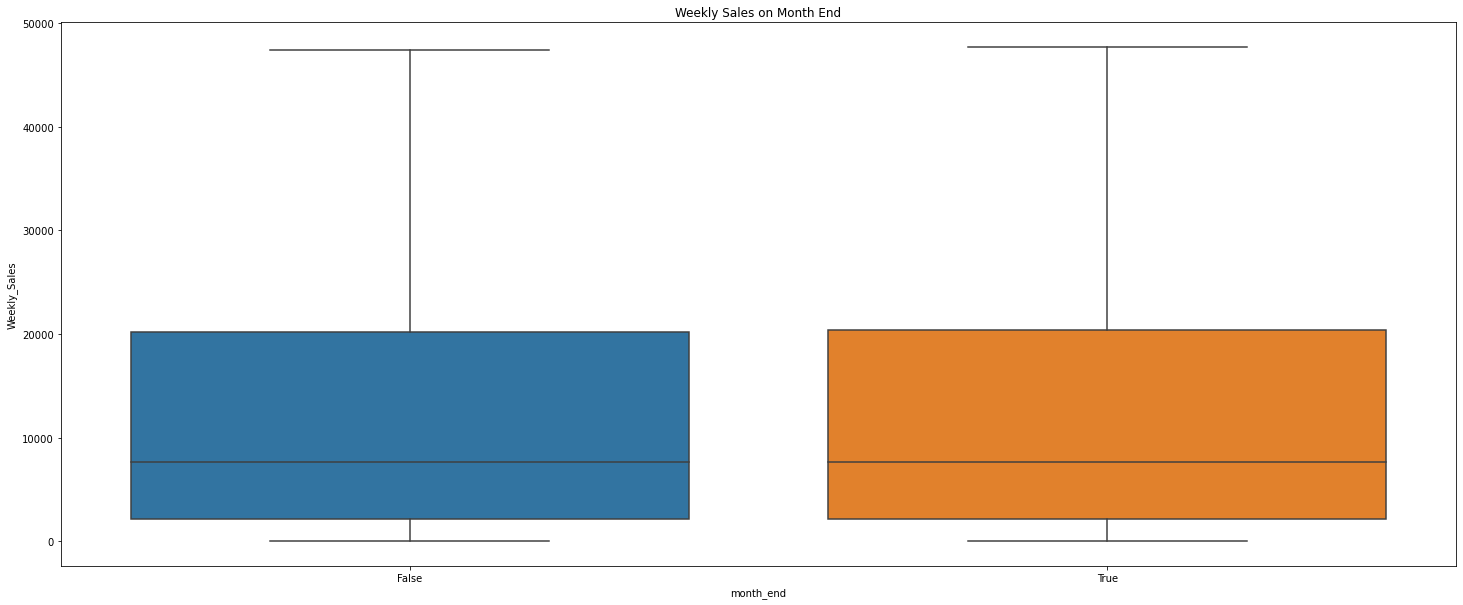

In [82]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x = 'month_end', y = 'Weekly_Sales', data = df_train, showfliers = False)
plt.title("Weekly Sales on Month End")
plt.show()

Month End feature has no impact on Sales and hence its not useful for the forecasting

In [83]:
# Analysis for Month Start Sales

Month_start_sales = df_train['Weekly_Sales'][df_train['month_start'] == 1]
Month_afterstart_sales = df_train['Weekly_Sales'][df_train['month_start'] == 0]

print("Mean of the sales in month start week: ", np.mean(Month_start_sales))
print("Standard devition of the sales in month start week: ", np.std(Month_start_sales))
print("Max sales in month start week: ", np.max(Month_start_sales))
print("Mean of the sales other than month start week: ", np.mean(Month_afterstart_sales))
print("Standard devition of the sales other than month start week: ", np.std(Month_afterstart_sales))
print("Max sales other than month start week: ", np.max(Month_afterstart_sales))

Mean of the sales in month start week:  16230.86551940547
Standard devition of the sales in month start week:  22686.472378730534
Max sales in month start week:  293966.05
Mean of the sales other than month start week:  15979.294986687777
Standard devition of the sales other than month start week:  22738.86727560598
Max sales other than month start week:  693099.36


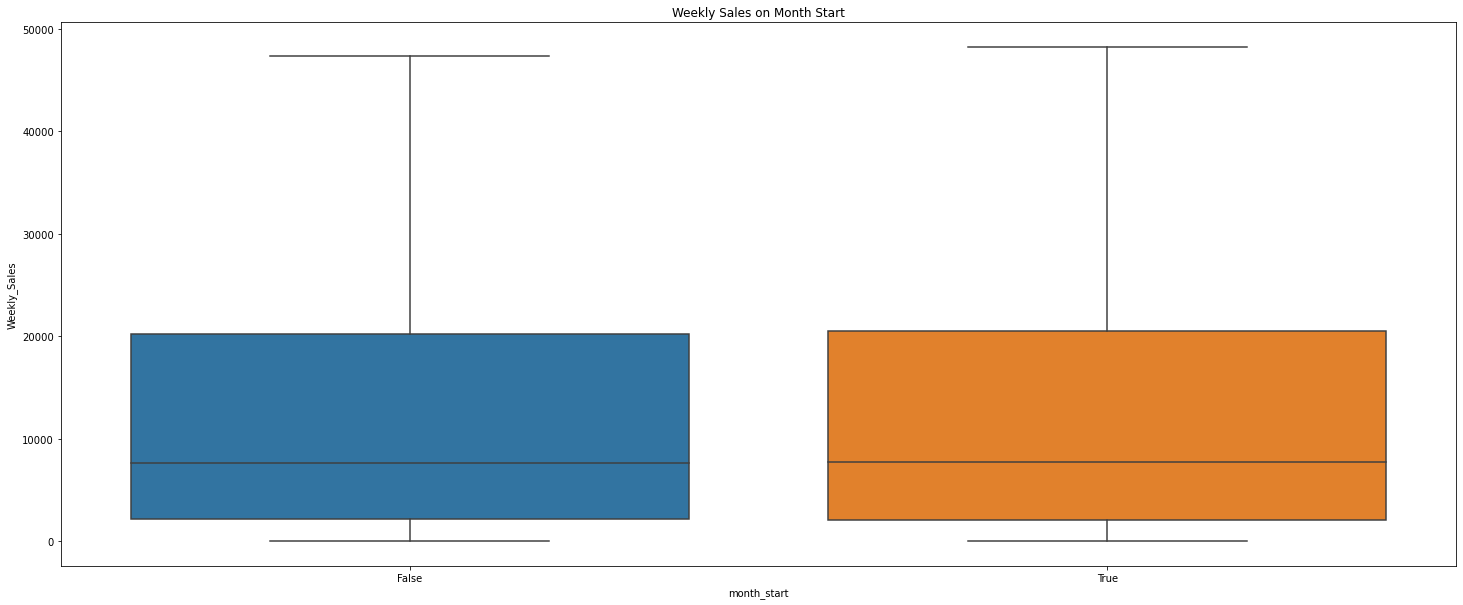

In [84]:
fig, ax = plt.subplots(figsize=(25, 10))
fig = sns.boxplot(x = 'month_start', y = 'Weekly_Sales', data = df_train, showfliers=False)
plt.title("Weekly Sales on Month Start")
plt.show()

#### Relationship of Week and Sales

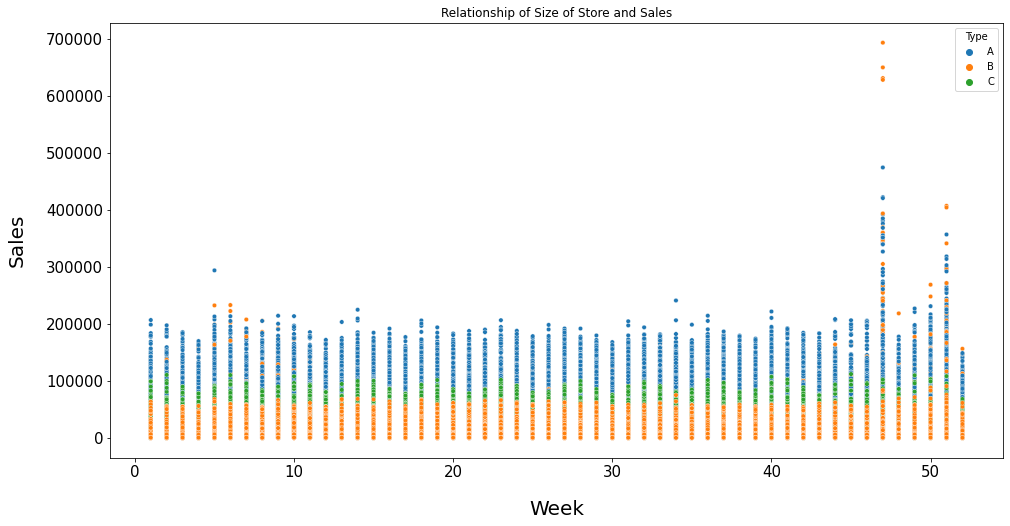

In [85]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'Week', y = 'Weekly_Sales', s=20, data = df_train, hue = 'Type');

plt.xticks( fontsize =15)
plt.yticks( fontsize =15)
plt.title('Relationship of Size of Store and Sales')
plt.xlabel('Week', fontsize =20, labelpad=20)
plt.ylabel('Sales', fontsize =20, labelpad=20);

#### Relationship of Size of Store and Sales

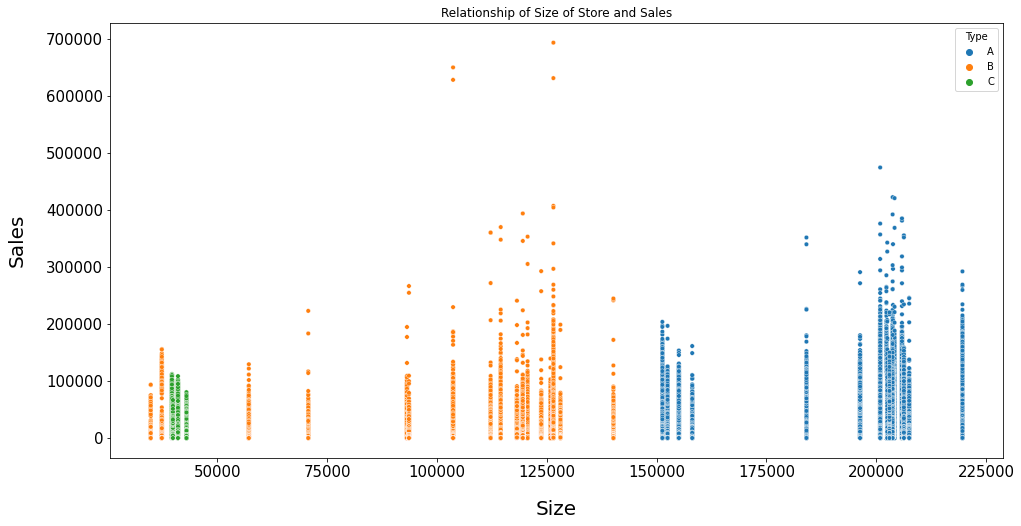

In [86]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'Size', y = 'Weekly_Sales', s=20, data = df_train, hue = 'Type');

plt.xticks( fontsize =15)
plt.yticks( fontsize =15)
plt.title('Relationship of Size of Store and Sales')
plt.xlabel('Size', fontsize =20, labelpad=20)
plt.ylabel('Sales', fontsize =20, labelpad=20);

1. Sales increases as size of the store increases
2. Sales has linear relationship with the size of store.

#### Realtionship of CPI and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

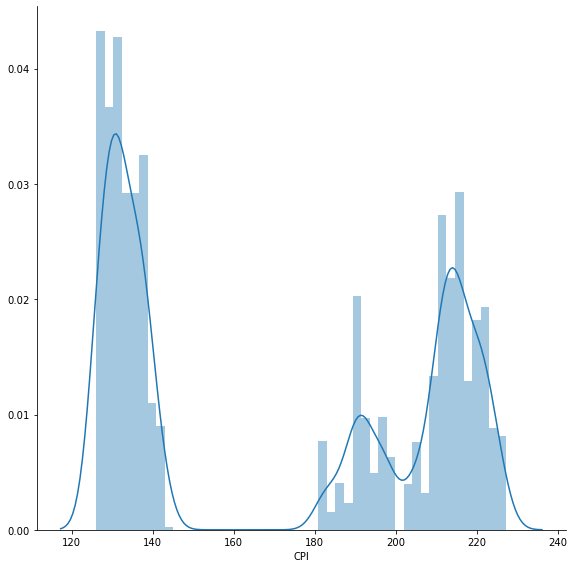

In [87]:
sns.FacetGrid(df_train, size = 8).map(sns.distplot,"CPI").add_legend();
plt.show

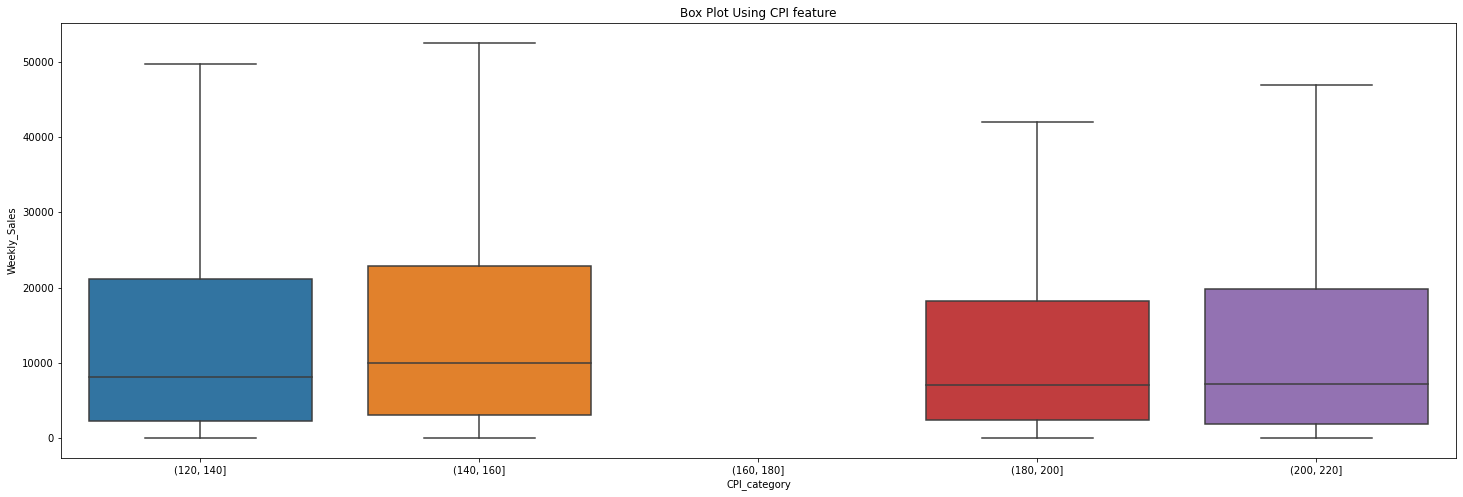

In [88]:
#Creation of bins for CPI feature
df_train['CPI_category'] = pd.cut(df_train['CPI'],bins=[120,140,160,180,200,220])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='CPI_category', y='Weekly_Sales', data=df_train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

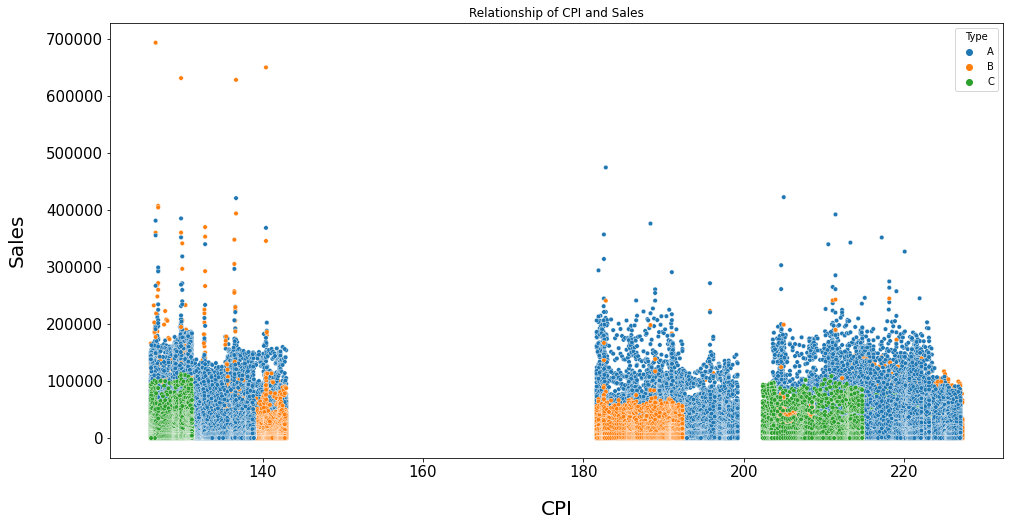

In [89]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'CPI', y = 'Weekly_Sales', s=20, data = df_train, hue = 'Type');

plt.xticks( fontsize =15)
plt.yticks( fontsize =15)
plt.title('Relationship of CPI and Sales')
plt.xlabel('CPI', fontsize =20, labelpad=20)
plt.ylabel('Sales', fontsize =20, labelpad=20);

1. No Data points between 150 to 170

#### Relationship of Fuel Price and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

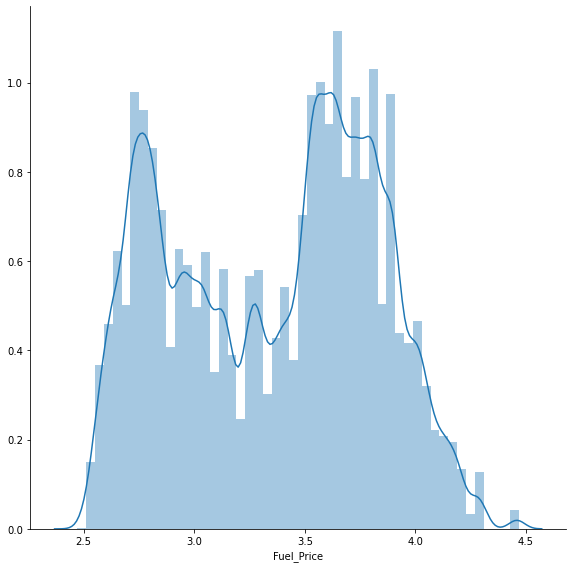

In [90]:
sns.FacetGrid(df_train,size=8).map(sns.distplot,"Fuel_Price").add_legend();
plt.show

1. Fuel price has very less impact on sales.
2. There is no change in sales as price of fuel increasing.
3. So this feature can also be removed.

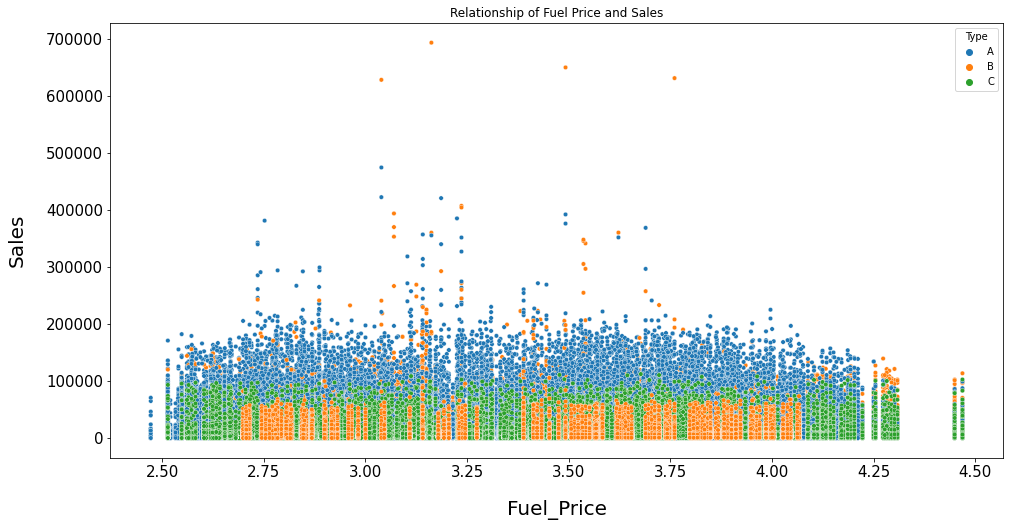

In [91]:
#Scatter Plot of Fuel Price and Weekly Sales
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'Fuel_Price', y = 'Weekly_Sales', s=20, data = df_train, hue = 'Type');

plt.xticks( fontsize =15)
plt.yticks( fontsize =15)
plt.title('Relationship of Fuel Price and Sales')
plt.xlabel('Fuel_Price', fontsize =20, labelpad=20)
plt.ylabel('Sales', fontsize =20, labelpad=20);

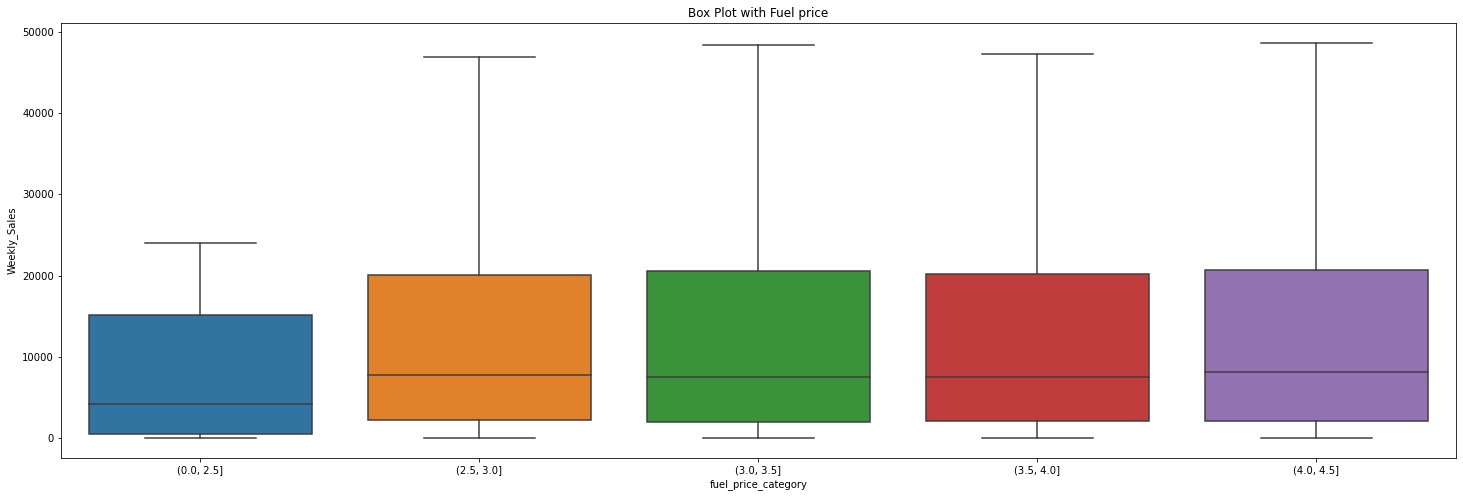

In [92]:
#Box Plot of Fuel Price and Sales.
df_train['fuel_price_category'] = pd.cut(df_train['Fuel_Price'],bins=[0,2.5,3,3.5,4,4.5])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='fuel_price_category', y='Weekly_Sales', data=df_train, showfliers=False)
plt.title("Box Plot with Fuel price")
plt.show()

1. The datapoints are higher when fuel rate was between 3.5 to 4.0 and 2.5-3.0.
2. The mean of all the bins are of same size.

#### Relation of Unemployment and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

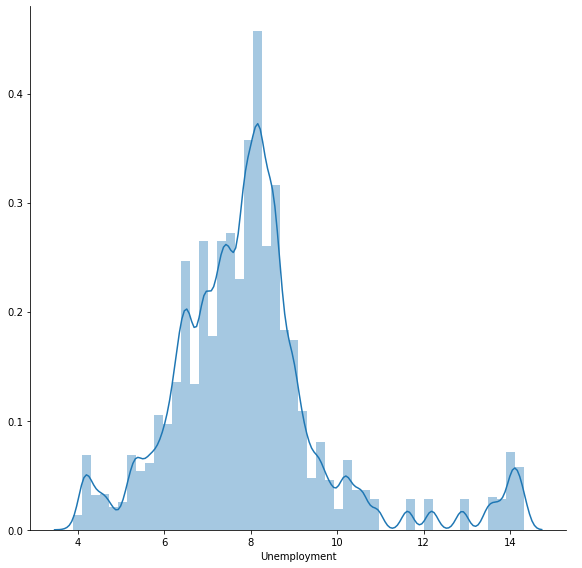

In [93]:
# Analysis for Unemployment feature
sns.FacetGrid(df_train, size=8).map(sns.distplot,"Unemployment").add_legend();
plt.show

1. Unemployment is maximum at point 8.

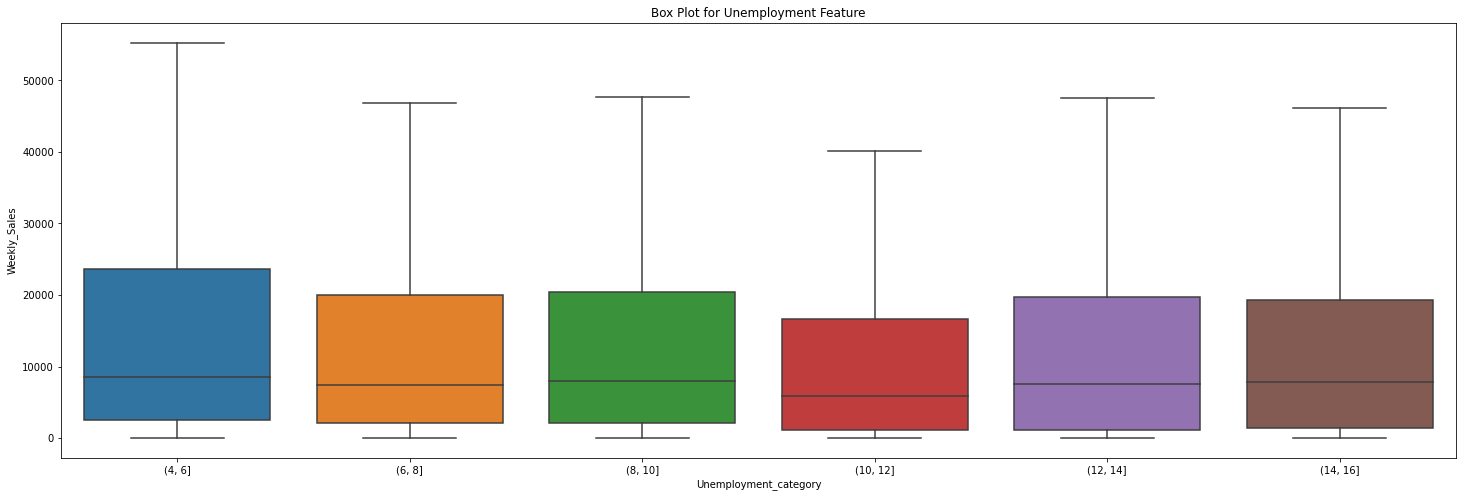

In [94]:
#Box Plot of Unemployment
df_train['Unemployment_category'] = pd.cut(df_train['Unemployment'],bins=[4,6,8,10,12,14,16])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Unemployment_category', y='Weekly_Sales', data = df_train, showfliers=False)
plt.title("Box Plot for Unemployment Feature")
plt.show()

1. All the unemployment bins have same mean value and hence the variable not useful. 

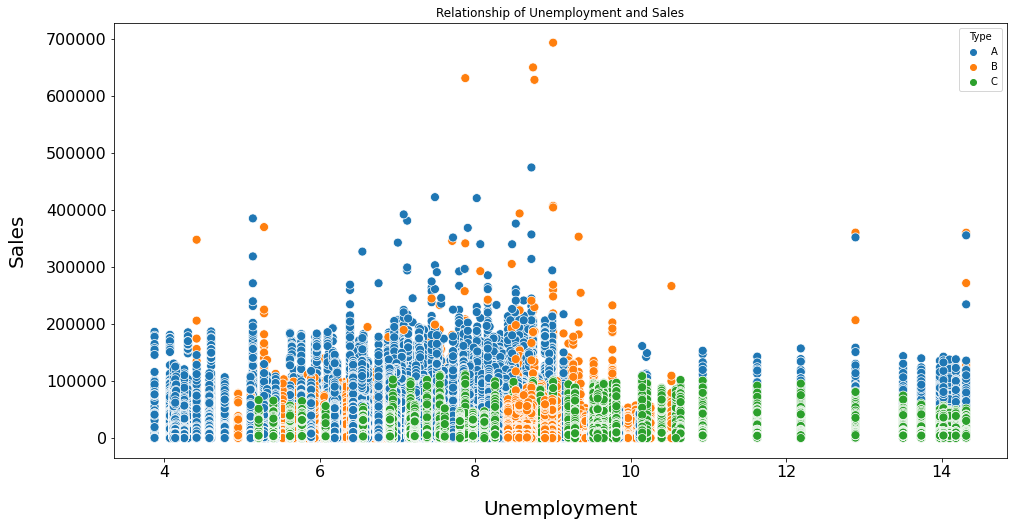

In [95]:
#Scatter Plot of Unemployment and Sales.
plt.figure(figsize=(16,8))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', hue='Type', s=80, data = df_train);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.title('Relationship of Unemployment and Sales')
plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

<function matplotlib.pyplot.show(close=None, block=None)>

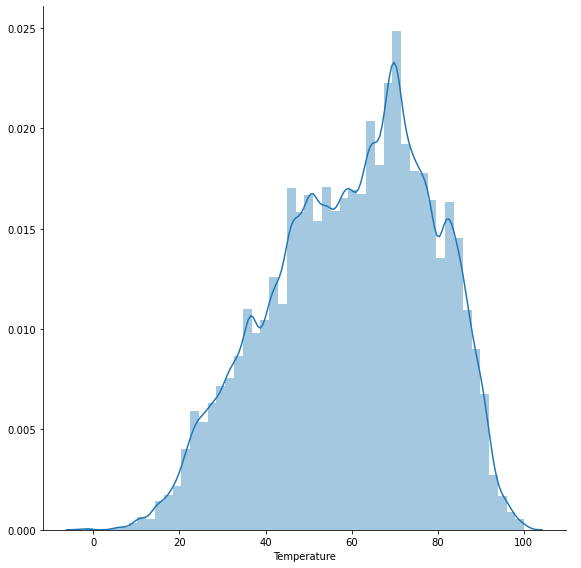

In [96]:
sns.FacetGrid(df_train,size = 8).map(sns.distplot,"Temperature").add_legend();
plt.show

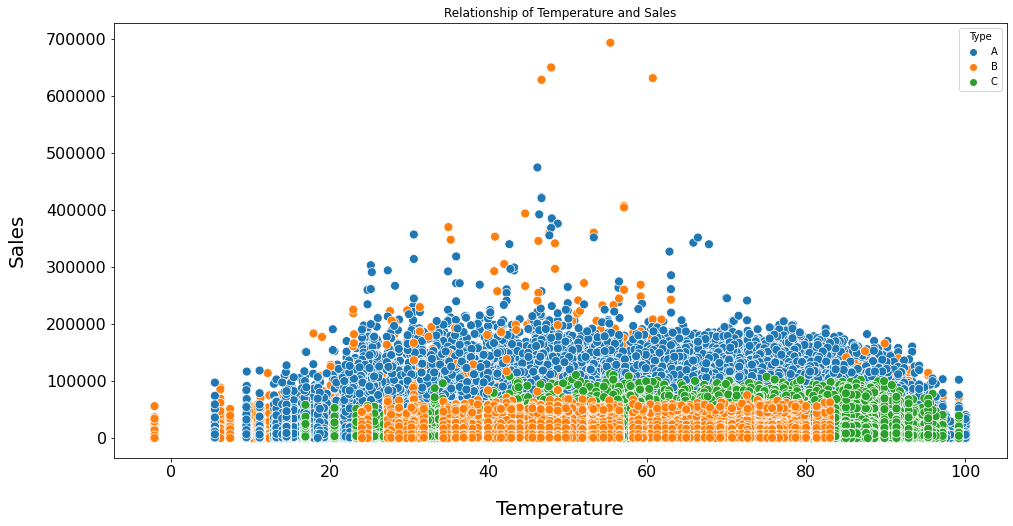

In [97]:
plt.figure(figsize=(16,8))
sns.scatterplot (x = 'Temperature', y = 'Weekly_Sales', hue = 'Type', s=80, data = df_train);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.title('Relationship of Temperature and Sales')
plt.ylabel('Sales', fontsize=20, labelpad=20);

1. The data point lies in 60-80 F temperatures
2. It seems as most of the sales also happens in this tempertaure range.

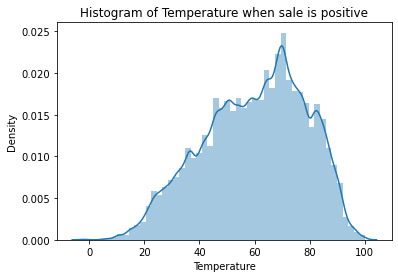

In [98]:
positive_temperature = df_train[df_train['Weekly_Sales'] > 0 ]['Temperature']
sns.distplot(positive_temperature)
plt.title("Histogram of Temperature when sale is positive")
plt.show()

 In between 60-80 F temperature, The rate of sales is more.

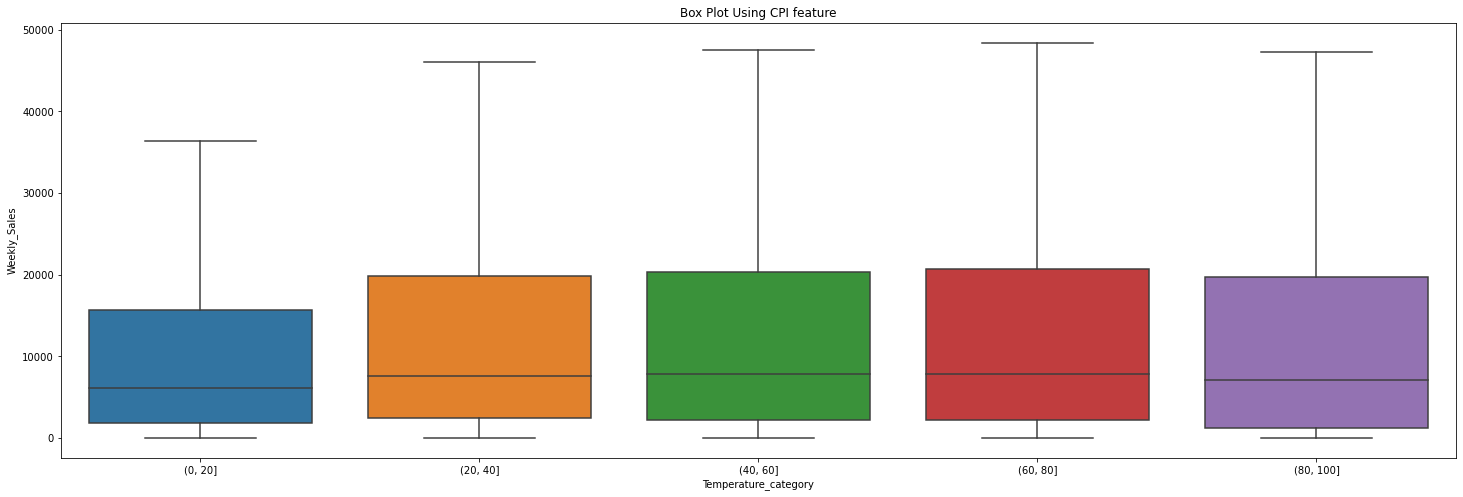

In [99]:
df_train['Temperature_category'] = pd.cut(df_train['Temperature'],bins=[0,20,40,60,80,100])
fig, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x='Temperature_category', y='Weekly_Sales', data=df_train, showfliers=False)
plt.title("Box Plot Using CPI feature")
plt.show()

1. It seems 60-80 temperature have almost same sale as different temperature.
2. This feature can also be removed.

In [100]:
# Creating subset to understand which store has highest sales for particular month.
grp = df_train.groupby(["Month","Store"])
monthly_average = grp.aggregate({"Weekly_Sales":np.mean})
store_value = monthly_average.loc[monthly_average.groupby('Month')['Weekly_Sales'].idxmax()]
print("Stores with highest value for particular month: ")
store_value

Stores with highest value for particular month: 


Weekly_Sales
Month Store              
1     4      26792.255620
2     20     30499.281528
3     14     28550.643923
4     14     29557.689553
5     14     29439.083763
6     20     30032.278419
7     20     28916.581834
8     4      29082.862586
9     20     28006.353978
10    4      28723.672097
11    20     33133.195079
12    20     36963.445276

1. 3 stores are more dominant than rest of the stores.
2. Store 20, 14 and 4 have most number of weekely sales.
3. Store 20 is most dominant and sales during thanksgiving and christmas is more for store 20. 
4. Even on Labour and Superbowl day, sales of Store 20 is more.
5. So we can make a category of holidays as feature.

#### Creating Dataset for Training

In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  420285 non-null  int64         
 1   Dept                   420285 non-null  int64         
 2   Date                   420285 non-null  datetime64[ns]
 3   Weekly_Sales           420285 non-null  float64       
 4   IsHoliday              420285 non-null  int64         
 5   Year                   420285 non-null  int64         
 6   Month                  420285 non-null  int64         
 7   Week                   420285 non-null  int64         
 8   Day                    420285 non-null  int64         
 9   n_days                 420285 non-null  int64         
 10  Type                   420285 non-null  object        
 11  Size                   420285 non-null  int64         
 12  Temperature            420285 non-null  floa

In [102]:
store_type_values = {'A':3, 'B':2, 'C':1}
df_train['Type_Numeric'] = df_train.Type.map(store_type_values)
df_test['Type_Numeric'] = df_test.Type.map(store_type_values)

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Store                  420285 non-null  int64         
 1   Dept                   420285 non-null  int64         
 2   Date                   420285 non-null  datetime64[ns]
 3   Weekly_Sales           420285 non-null  float64       
 4   IsHoliday              420285 non-null  int64         
 5   Year                   420285 non-null  int64         
 6   Month                  420285 non-null  int64         
 7   Week                   420285 non-null  int64         
 8   Day                    420285 non-null  int64         
 9   n_days                 420285 non-null  int64         
 10  Type                   420285 non-null  object        
 11  Size                   420285 non-null  int64         
 12  Temperature            420285 non-null  floa

In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  int64         
 4   Year          115064 non-null  int64         
 5   Month         115064 non-null  int64         
 6   Week          115064 non-null  int64         
 7   Day           115064 non-null  int64         
 8   n_days        115064 non-null  int64         
 9   Type          115064 non-null  object        
 10  Size          115064 non-null  int64         
 11  Temperature   115064 non-null  float64       
 12  Fuel_Price    115064 non-null  float64       
 13  MarkDown1     115064 non-null  float64       
 14  MarkDown2     115064 non-null  float64       
 15  MarkDown3     115

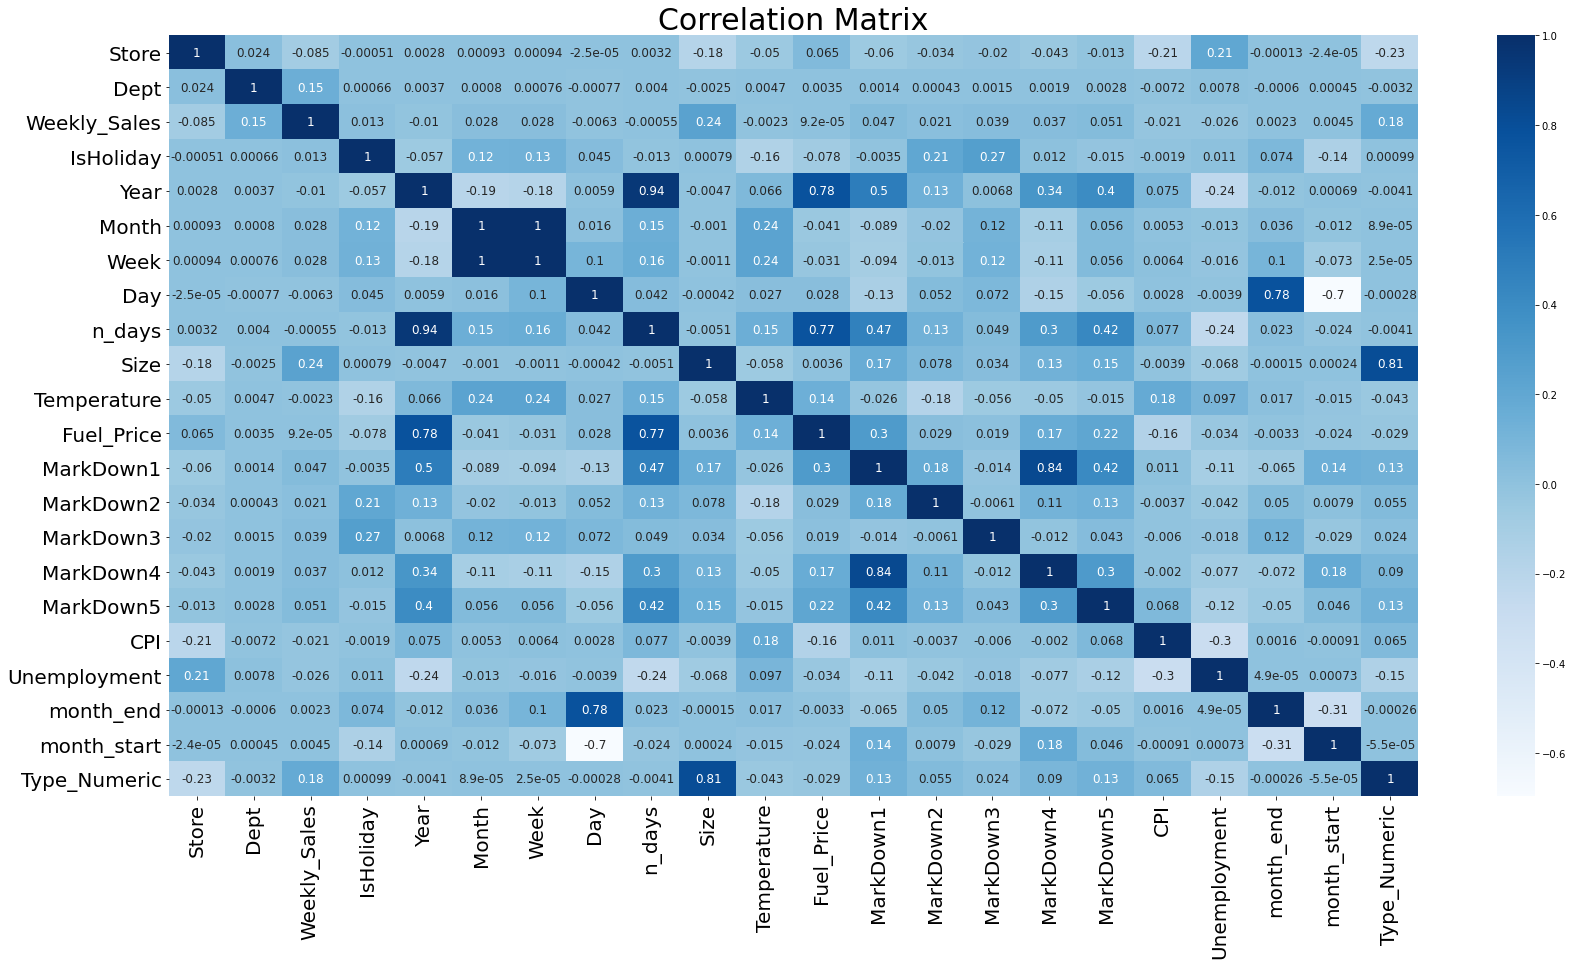

In [105]:
#Correlation Matrix

plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

sns.heatmap(df_train.corr(), cmap='Blues', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

1. Department, Store size and Type have moderate correlation with the weekly sales.
2. Markdown 1 - 5 have very weak correlation with the weekly sales and these columns will be removed from the analysis.
3.  Month and Day as this will cause multicolinearity with week column and hence both these variables are dropped.
4. IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks.
5. Temperature, Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out.

In [106]:
# Data Preparation for Model Training.

Following steps will be performed for preparing the data for the subsequent model training

1. Weak columns are dropped.
2. Input and Target dataframes are created
3. Input data are scaled 0 to 1 range.
4. Training and Validation datasets are created for model building.
5. A function is defined based on which the models performance is measured.

Droping the columns for training and testing data

In [107]:
df_training = df_train.drop(['Date', 'Temperature','Fuel_Price', 'Type','Temperature_category','fuel_price_category','Unemployment_category','CPI_category','month_start','month_end','n_days', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

df_testing = df_test.drop(['Date', 'Temperature','Fuel_Price', 'Type', 'n_days','Month','Day', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'], axis=1)

In [108]:
df_training.head()

Store  Dept  Weekly_Sales  IsHoliday  Year  Week    Size  Type_Numeric
0      1     1      24924.50          0  2010     5  151315             3
1      1     1      46039.49          1  2010     6  151315             3
2      1     1      41595.55          0  2010     7  151315             3
3      1     1      19403.54          0  2010     8  151315             3
4      1     1      21827.90          0  2010     9  151315             3

In [109]:
df_training.describe()

Store           Dept   Weekly_Sales     IsHoliday  \
count  420285.000000  420285.000000  420285.000000  420285.00000   
mean       22.195477      44.242771   16030.329773       0.07034   
std        12.787213      30.507197   22728.500149       0.25572   
min         1.000000       1.000000       0.000000       0.00000   
25%        11.000000      18.000000    2117.560000       0.00000   
50%        22.000000      37.000000    7659.090000       0.00000   
75%        33.000000      74.000000   20268.380000       0.00000   
max        45.000000      99.000000  693099.360000       1.00000   

                Year           Week           Size   Type_Numeric  
count  420285.000000  420285.000000  420285.000000  420285.000000  
mean     2010.968443      25.827729  136749.569176       2.410483  
std         0.796893      14.152442   60992.688568       0.666411  
min      2010.000000       1.000000   34875.000000       1.000000  
25%      2010.000000      14.000000   93638.000000       2.000000  
50%      2011.000000      26.000000  140167.000000       3.000000  
75%      2012.000000      38.000000  202505.000000       3.000000  
max      2012.000000      52.000000  219622.000000       3.000000

In [110]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 420284
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Weekly_Sales  420285 non-null  float64
 3   IsHoliday     420285 non-null  int64  
 4   Year          420285 non-null  int64  
 5   Week          420285 non-null  int64  
 6   Size          420285 non-null  int64  
 7   Type_Numeric  420285 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 45.0 MB


In [111]:
df_training.head()

Store  Dept  Weekly_Sales  IsHoliday  Year  Week    Size  Type_Numeric
0      1     1      24924.50          0  2010     5  151315             3
1      1     1      46039.49          1  2010     6  151315             3
2      1     1      41595.55          0  2010     7  151315             3
3      1     1      19403.54          0  2010     8  151315             3
4      1     1      21827.90          0  2010     9  151315             3

In [112]:
# Identify input and target columns

input_col = df_training.columns.values.tolist() #Created new variable which contains all the values of training dataset

input_col.remove('Weekly_Sales') # Removed Weekly Sales column.
target_col = 'Weekly_Sales' # Stored value of weekly sales into target column.

df_input = df_training[input_col].copy() # Copy variables of input column to df_input.
target = df_training[target_col].copy() # Copy the target column variable target.

print(df_input.head())

print(target.head())

   Store  Dept  IsHoliday  Year  Week    Size  Type_Numeric
0      1     1          0  2010     5  151315             3
1      1     1          1  2010     6  151315             3
2      1     1          0  2010     7  151315             3
3      1     1          0  2010     8  151315             3
4      1     1          0  2010     9  151315             3
0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64


In [113]:
df_training

Store  Dept  Weekly_Sales  IsHoliday  Year  Week    Size  Type_Numeric
0           1     1      24924.50          0  2010     5  151315             3
1           1     1      46039.49          1  2010     6  151315             3
2           1     1      41595.55          0  2010     7  151315             3
3           1     1      19403.54          0  2010     8  151315             3
4           1     1      21827.90          0  2010     9  151315             3
...       ...   ...           ...        ...   ...   ...     ...           ...
420280     45    98        508.37          0  2012    39  118221             2
420281     45    98        628.10          0  2012    40  118221             2
420282     45    98       1061.02          0  2012    41  118221             2
420283     45    98        760.01          0  2012    42  118221             2
420284     45    98       1076.80          0  2012    43  118221             2

[420285 rows x 8 columns]

In [114]:
input_col

['Store', 'Dept', 'IsHoliday', 'Year', 'Week', 'Size', 'Type_Numeric']

In [115]:
# Scaling the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(df_training[input_col])

df_input[input_col] = scaler.transform(df_input[input_col])
df_testing[input_col] = scaler.transform(df_testing[input_col])

In [116]:
#Import Train Test Split

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    df_input, target, test_size=0.3, random_state=42)

In [117]:
# Defining the function of Evaluation Metrics.

def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

In [118]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

tree.fit(train_inputs, train_targets)

tree_train_preds = tree.predict(train_inputs)

# Compute WMAE on traing data

tree_train_wmae = WMAE(train_inputs, train_targets, tree_train_preds)
print('The WMAE loss for the training set is  {}.'.format(tree_train_wmae))


# Compute WMAE on validation data

tree_val_preds = tree.predict(val_inputs)
tree_val_wmae = WMAE(val_inputs, val_targets, tree_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(tree_val_wmae))

The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1905.89.


In [119]:
tree.score(train_inputs,train_targets)

1.0

In [120]:
tree.score(val_inputs,val_targets)

0.962273265272915

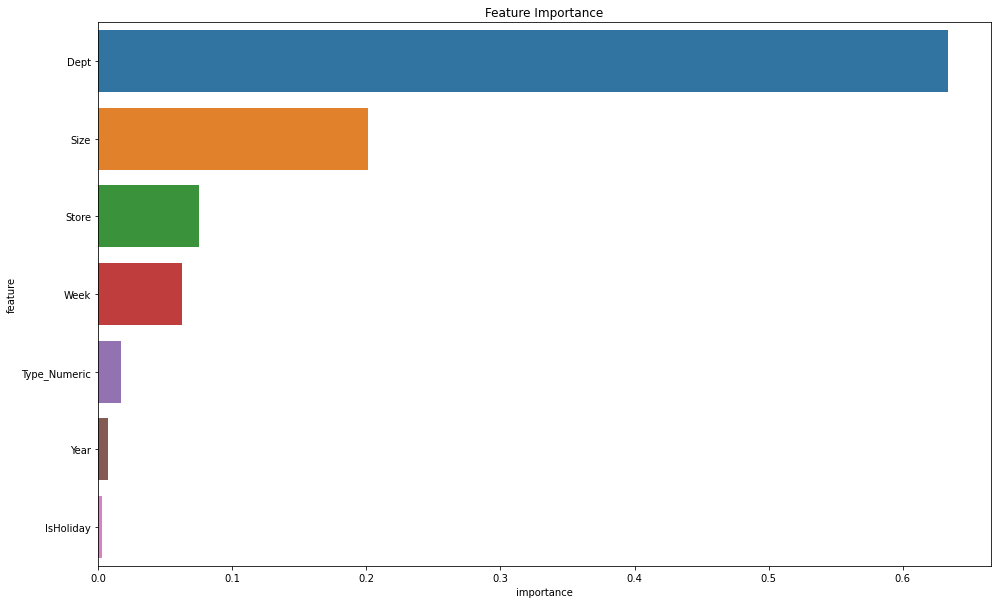

In [121]:
df_feature_importance_dt = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data = df_feature_importance_dt, x ='importance', y ='feature');

1.Department, Size, and Store have more feature importance than rest of them.

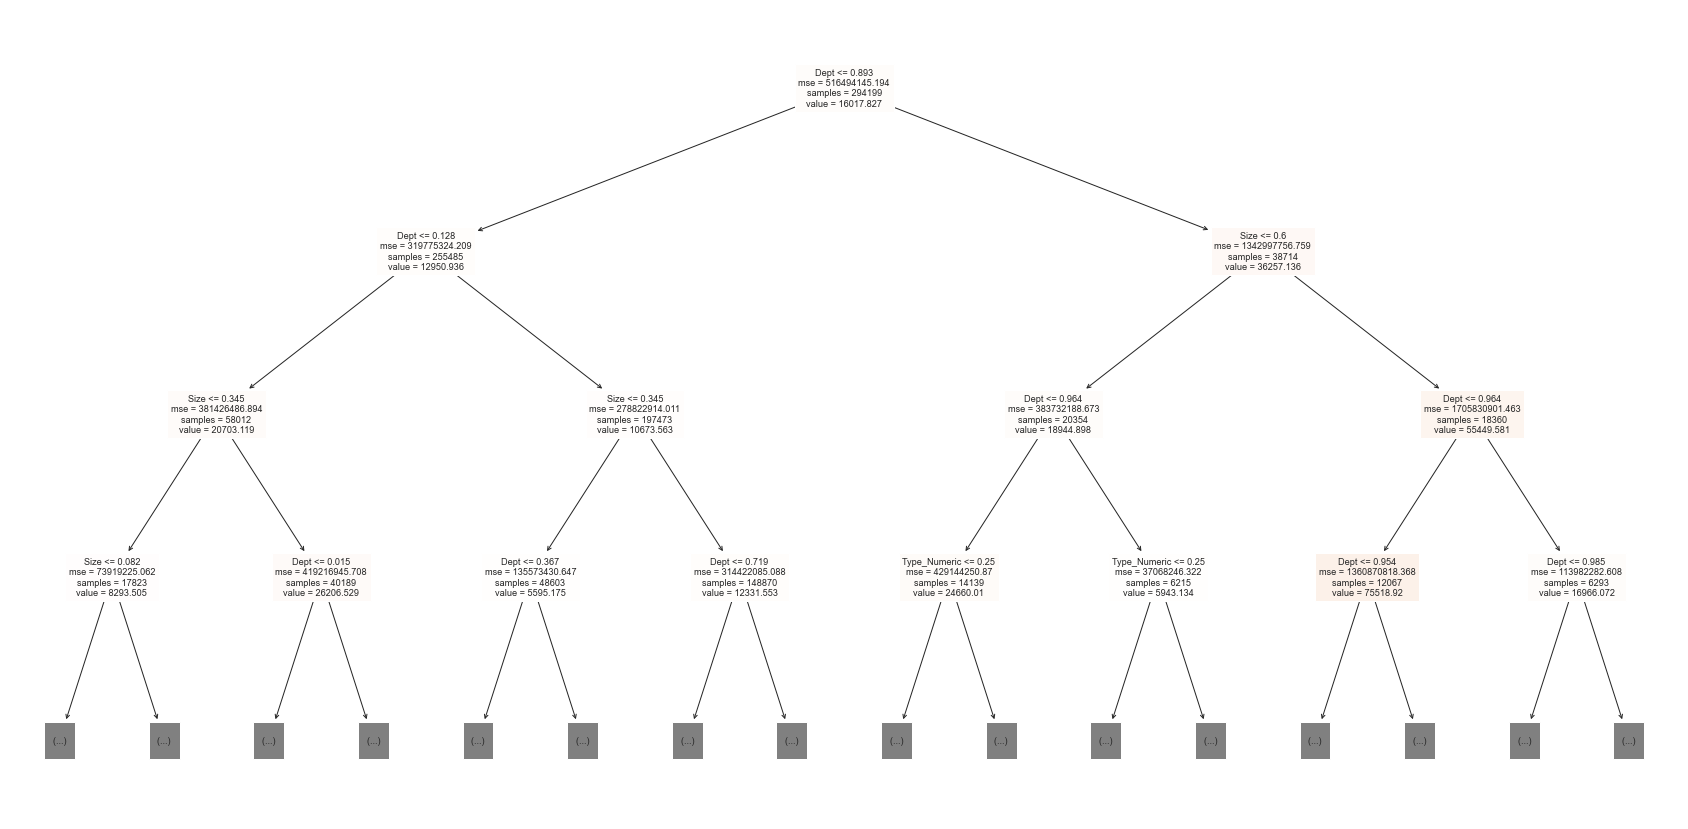

In [122]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

In [123]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 0)
dt.fit(train_inputs,train_targets)
y_pred = dt.predict(val_inputs)

In [124]:
accuracy = dt.score(val_inputs,val_targets)
accuracy

0.9615023004620668

## Random Forest

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  571.82.
The WMAE loss for the validation set is  1576.55.


In [126]:
rf1.score(val_inputs,val_targets)

0.9758411699082754

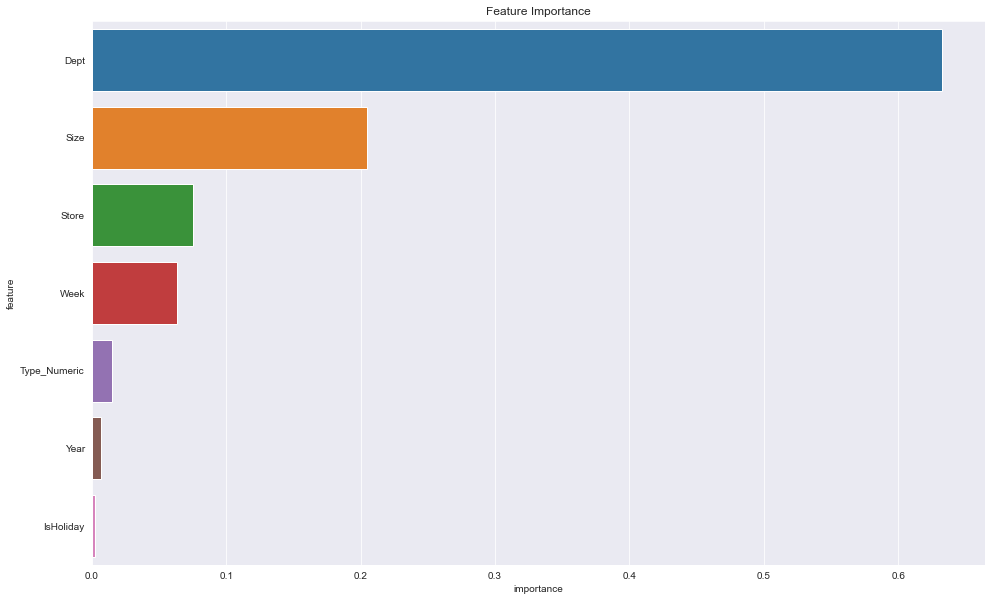

In [127]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Department, Store size, and store number are important features in Random Forest.

### Tuning of Random Forest.

In [128]:
#Defining the Hyperparameters and assigning the Evaluation Metrics.
def test_params(**params):  
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [129]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
# Plotting the Chart


    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

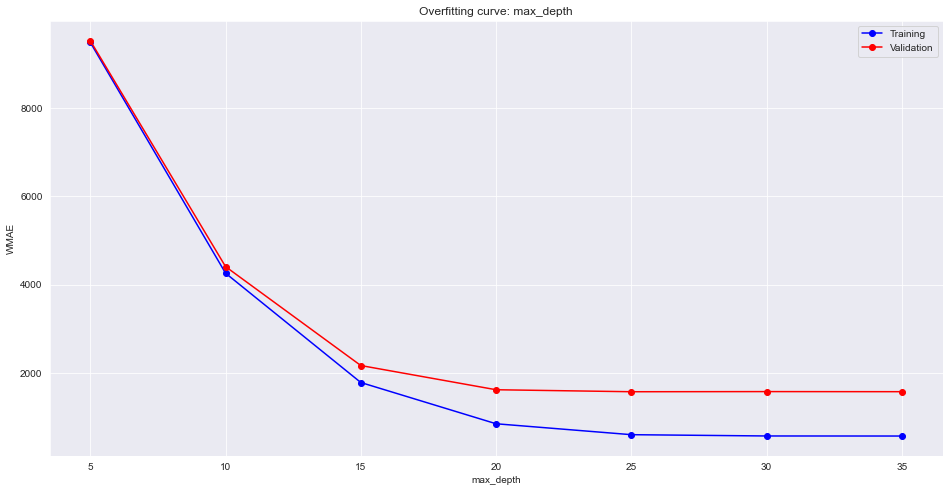

In [130]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

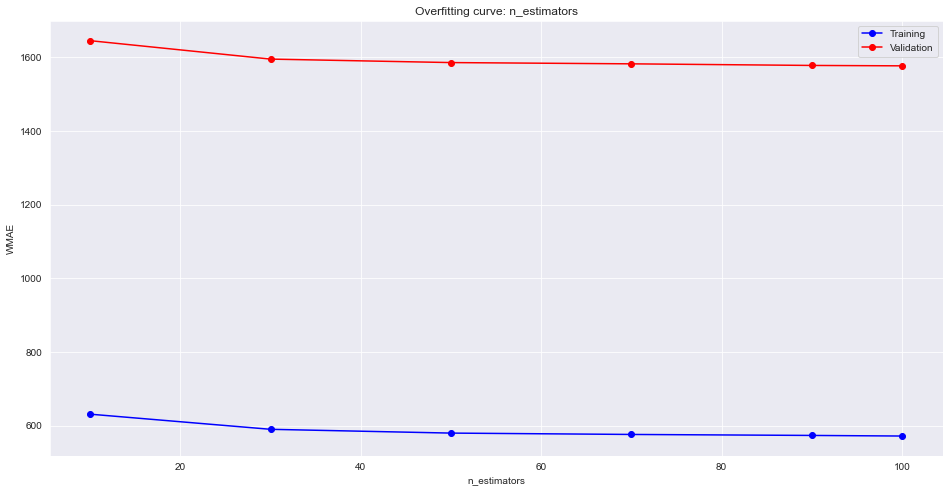

In [131]:
test_param_and_plot('n_estimators', [10, 30, 50, 70, 90, 100])

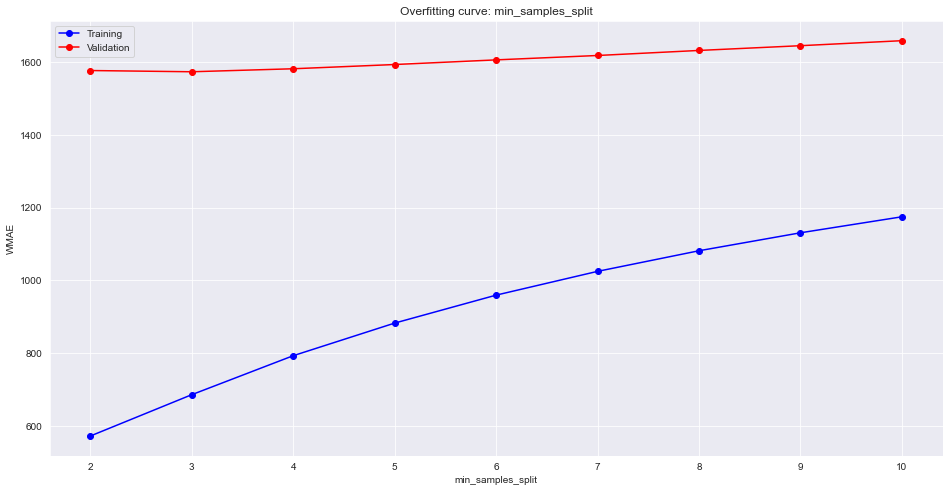

In [132]:
test_param_and_plot('min_samples_split', [2, 3, 4, 5, 6, 7, 8, 9, 10])

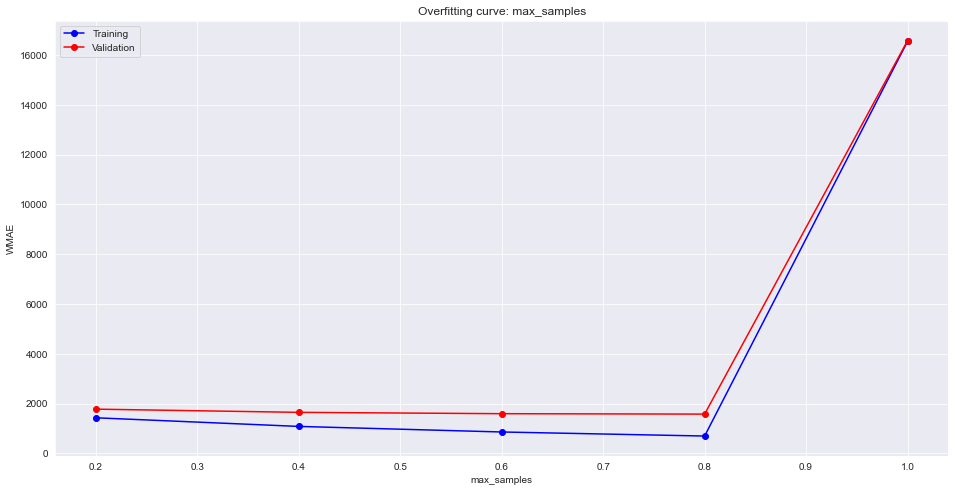

In [133]:
test_param_and_plot('max_samples', [0.2, 0.4, 0.6, 0.8, 1])

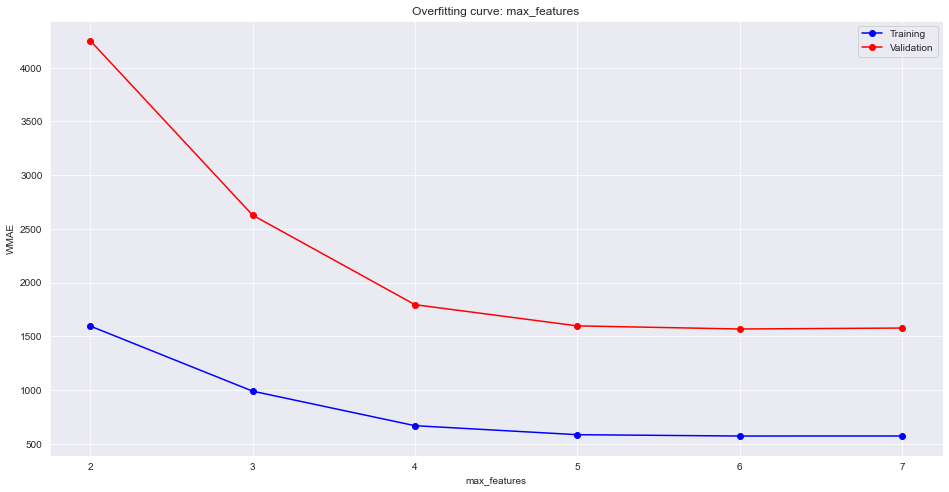

In [134]:
test_param_and_plot('max_features', [2, 3, 4, 5, 6, 7])

With the above tuning parameters, let us take best paramaeters to tune the Random Forest Model to minimize the validation error.

max_depth: 30
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 1
max_samples: 0.8
max_features: 7

In [135]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
rf1 = RandomForestRegressor(n_jobs=-1, max_depth=30, n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_samples=0.8, max_features=7,  random_state=42)

# Fit the model
rf1.fit(train_inputs, train_targets)

rf1_train_preds = rf1.predict(train_inputs)

# Compute WMAE on traing data
rf1_train_wmae = WMAE(train_inputs, train_targets, rf1_train_preds)
print('The WMAE loss for the training set is  {}.'.format(rf1_train_wmae))

rf1_val_preds = rf1.predict(val_inputs)

# Compute WMAE on validation data
rf1_val_wmae = WMAE(val_inputs, val_targets, rf1_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(rf1_val_wmae))

The WMAE loss for the training set is  700.6.
The WMAE loss for the validation set is  1580.99.


1. The error seems to be more than the normal RF model and these parameters cannot be considered.
2. After few guesses, the parameters with below values have founded the best tuning method for random forest.

max_depth: 30
n_estimators: 130
min_samples_split: 2
min_samples_leaf: 1
max_samples: 0.9999
max_features: 6

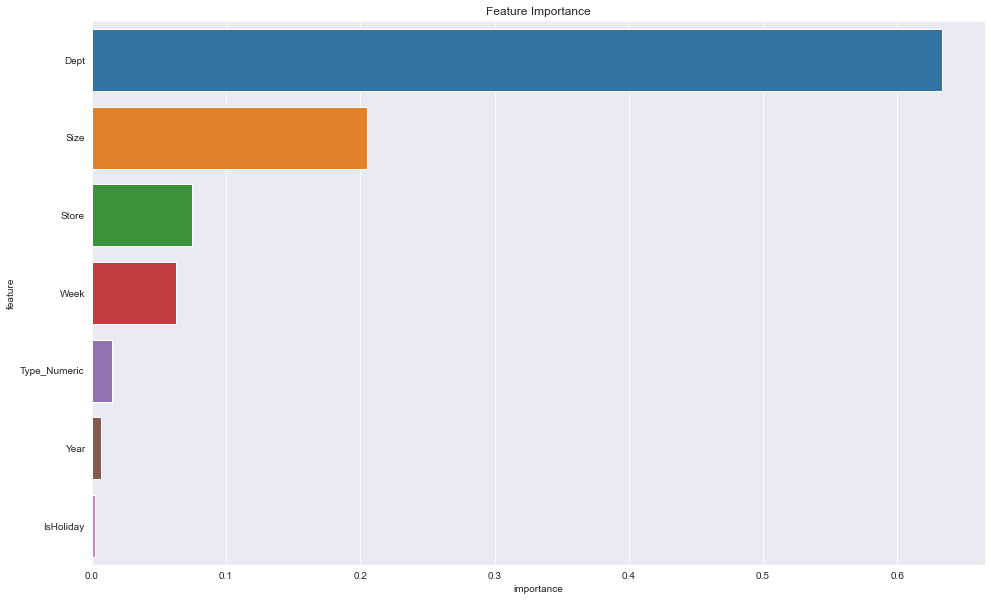

In [136]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

The error is less than compared to original Random Forest Model.

In [137]:
rf1.score(val_inputs,val_targets)

0.9755274018931376

The accuracy is slightly higher than the original Random Forest Model.

## Gradient Boost

In [138]:
from sklearn.ensemble import GradientBoostingRegressor

In [139]:
# Create the model
gbm = GradientBoostingRegressor(random_state=42)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on test data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  7141.58.
The WMAE loss for the validation set is  7173.93.


In [140]:
gbm.score(val_inputs,val_targets)

0.7377807873950415

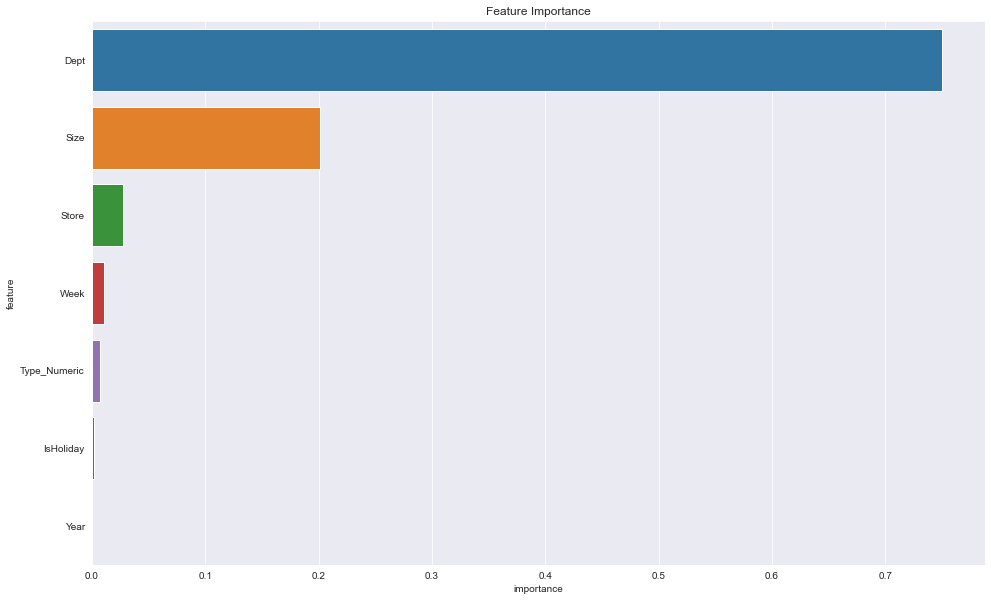

In [141]:
#Feature Importance
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,10))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

In [142]:
#Defining the Gradient Boost hyperparameters.
def test_params_gb(**params):  
    model = GradientBoostingRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [143]:
def test_param_and_plot_gb(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_wmae, val_wmae = test_params_gb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)

#Plotting the Data

    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend(['Training', 'Validation'])

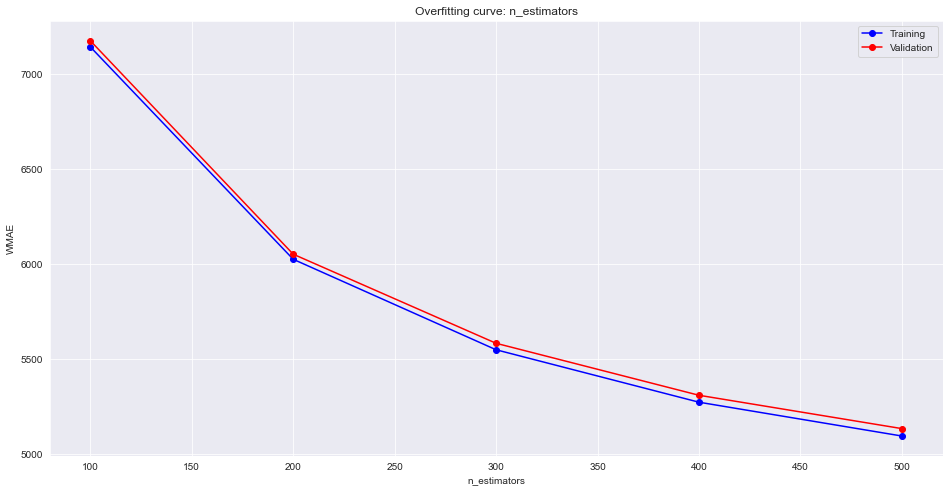

In [144]:
test_param_and_plot_gb('n_estimators', [100, 200, 300, 400, 500])

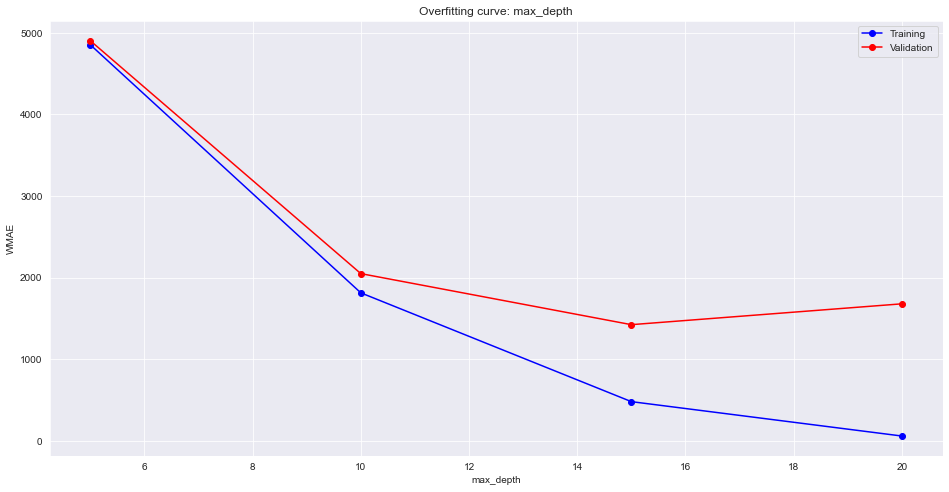

In [145]:
test_param_and_plot_gb('max_depth', [5, 10, 15, 20])

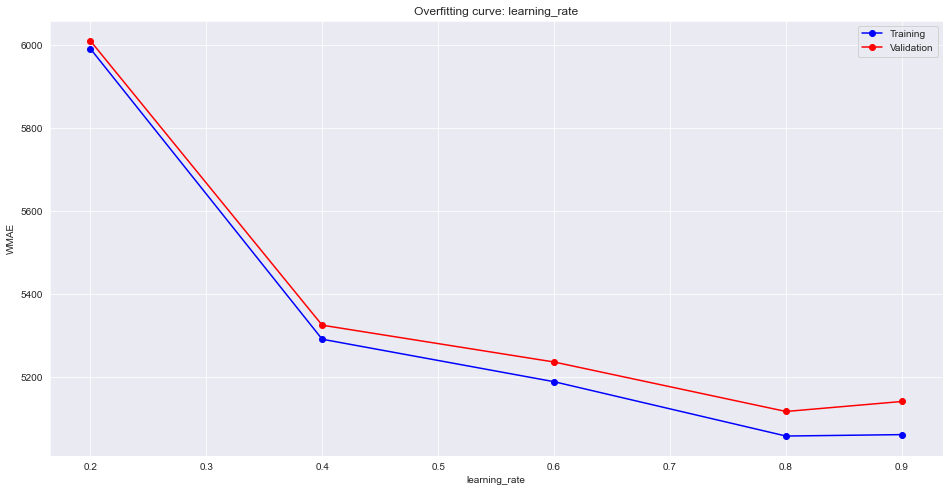

In [146]:
test_param_and_plot_gb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

In [147]:
# Create the model
gbm = GradientBoostingRegressor(random_state=42, n_estimators=500, max_depth=20, learning_rate=0.8)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on test data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  0.0.
The WMAE loss for the validation set is  1806.23.


In [148]:
gbm.score(val_inputs,val_targets)

0.9661506919400844

In [149]:
# Create the model
gbm = GradientBoostingRegressor(random_state=42, n_estimators=400, max_depth = 15, learning_rate = 0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data
gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is  {}.'.format(gbm_train_wmae))

gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on test data
gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is  {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is  1.68.
The WMAE loss for the validation set is  1476.71.


In [150]:
# Score of Gradient Boost Algorithm.
gbm.score(val_inputs,val_targets)

0.9795024295917666

### Model Comparison

In [156]:
#Comparison Table

!pip install prettytable

In [157]:
from prettytable import PrettyTable
    
pt = PrettyTable()
pt.field_names = ["Model" ,"Accuracy","WMAE"]
pt.add_row(["Decision Tree", 96.15, 1909.66])
pt.add_row(["Random Forest", 97.58, 1576.55])
pt.add_row(["Random Forest after fine tuning", 97.65,1566.07])
pt.add_row(["Gradient Boosting", 73.77, 7173.93])
pt.add_row(["Gradient Boosting after fine tuning", 97.95, 1476.71 ])

print(pt)

+-------------------------------------+----------+---------+
|                Model                | Accuracy |   WMAE  |
+-------------------------------------+----------+---------+
|            Decision Tree            |  96.15   | 1909.66 |
|            Random Forest            |  97.58   | 1576.55 |
|   Random Forest after fine tuning   |  97.65   | 1566.07 |
|          Gradient Boosting          |  73.77   | 7173.93 |
| Gradient Boosting after fine tuning |  97.95   | 1476.71 |
+-------------------------------------+----------+---------+


1. Lesser the value of WMAE for model, better the model performance.
2. Gradient boosting after fine tuning gives more accuracy and less WMAE

## Conclusions

1. Store of Type 'A' is more than 'B' and 'C'.
2. Sales are constant throughout the year and more during Thanksgiving and Christmas.
3. Sales are also dependent on Department
4. Store size also contribute to the final variable.
5. Gradient Descent with Hyperparameter tuning is the best model with best accuracy and least error.